In [1]:
!python -m pip install seaborn

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Read and Prepare Data

In [3]:
df = pd.read_csv("C:/Users/mekho/Documents/PycharmProjects/LinkedIn_Quiz/data/Food/wrangled_data.csv")

C:\Users\mekho\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,16,27,28,29,30,37,38,39,43,44,45,99,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(230875, 178)

In [5]:
df.head()

Unnamed: 0  DISPCODE  SEQNO STATERE1 SAFETIME HHADULT GENHLTH  PHYSHLTH  \
0           0       NaN    NaN      NaN      NaN     NaN     NaN       NaN   
1           1       NaN    NaN      NaN      NaN     NaN     NaN       NaN   
2           2       NaN    NaN      NaN      NaN     NaN     NaN       NaN   
3           3       NaN    NaN      NaN      NaN     NaN     NaN       NaN   
4           4       NaN    NaN      NaN      NaN     NaN     NaN       NaN   

   MENTHLTH POORHLTH  ...  _PAREC1  _PASTAE1  _RFSEAT2  _RFSEAT3  _FLSHOT6  \
0       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   
1       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   
2       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   
3       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   
4       NaN      NaN  ...      NaN       NaN       NaN       NaN       NaN   

  _PNEUMO2 _AIDTST3 _MMSAWT MMSANAME  _MMSA  
0      NaN      NaN     NaN      NaN    NaN  
1      NaN      NaN     NaN      NaN    NaN  
2      NaN      NaN     NaN      NaN    NaN  
3      NaN      NaN     NaN      NaN    NaN  
4      NaN      NaN     NaN      NaN    NaN  

[5 rows x 178 columns]

In [6]:
names = [str(n).split(',')[0].strip() for n in df.MMSANAME]

df['city'] = names

df = df.loc[df.city != 'nan', :].copy()

In [7]:
df.head()

Unnamed: 0  DISPCODE         SEQNO STATERE1 SAFETIME HHADULT GENHLTH  \
512         512    1200.0  2.017000e+09                 1      01       1   
513         513    1200.0  2.017000e+09                 1      02       1   
514         514    1200.0  2.017000e+09                 1      01       4   
515         515    1200.0  2.017000e+09                 1               2   
516         516    1200.0  2.017000e+09                 1               4   

     PHYSHLTH  MENTHLTH POORHLTH  ...  _PASTAE1  _RFSEAT2  _RFSEAT3  _FLSHOT6  \
512      88.0      88.0           ...       9.0       9.0       9.0             
513      88.0      88.0           ...       1.0       1.0       1.0             
514      88.0      30.0       30  ...       1.0       1.0       1.0             
515      88.0       5.0       02  ...       2.0       1.0       1.0             
516      30.0      10.0       15  ...       9.0       9.0       9.0         9   

     _PNEUMO2 _AIDTST3      _MMSAWT  \
512                      247.441661   
513                  2   161.334971   
514                  1   756.699459   
515                  1  1236.323980   
516         9            213.968412   

                                              MMSANAME    _MMSA  \
512  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
513  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
514  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
515  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
516  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   

                        city  
512  Albany-Schenectady-Troy  
513  Albany-Schenectady-Troy  
514  Albany-Schenectady-Troy  
515  Albany-Schenectady-Troy  
516  Albany-Schenectady-Troy  

[5 rows x 179 columns]

In [8]:
df.columns

Index(['Unnamed: 0', 'DISPCODE', 'SEQNO', 'STATERE1', 'SAFETIME', 'HHADULT',
       'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       ...
       '_PASTAE1', '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3',
       '_MMSAWT', 'MMSANAME', '_MMSA', 'city'],
      dtype='object', length=179)

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

DISPCODE         SEQNO STATERE1 SAFETIME HHADULT GENHLTH  PHYSHLTH  \
512    1200.0  2.017000e+09                 1      01       1      88.0   
513    1200.0  2.017000e+09                 1      02       1      88.0   
514    1200.0  2.017000e+09                 1      01       4      88.0   
515    1200.0  2.017000e+09                 1               2      88.0   
516    1200.0  2.017000e+09                 1               4      30.0   

     MENTHLTH POORHLTH  HLTHPLN1  ...  _PASTAE1  _RFSEAT2  _RFSEAT3  _FLSHOT6  \
512      88.0                1.0  ...       9.0       9.0       9.0             
513      88.0                1.0  ...       1.0       1.0       1.0             
514      30.0       30       1.0  ...       1.0       1.0       1.0             
515       5.0       02       1.0  ...       2.0       1.0       1.0             
516      10.0       15       1.0  ...       9.0       9.0       9.0         9   

    _PNEUMO2 _AIDTST3      _MMSAWT  \
512                     247.441661   
513                 2   161.334971   
514                 1   756.699459   
515                 1  1236.323980   
516        9            213.968412   

                                              MMSANAME    _MMSA  \
512  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
513  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
514  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
515  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   
516  Albany-Schenectady-Troy, NY, Metropolitan Stat...  10580.0   

                        city  
512  Albany-Schenectady-Troy  
513  Albany-Schenectady-Troy  
514  Albany-Schenectady-Troy  
515  Albany-Schenectady-Troy  
516  Albany-Schenectady-Troy  

[5 rows x 178 columns]

In [11]:
columns_to_select = [c for c in df.columns if c.startswith('_')]
columns_to_select = ['city'] + columns_to_select
df = df.loc[:, columns_to_select]

In [12]:
df.head()

city _URBNRRL   _STSTR  _IMPSEX  _RFHLTH  _PHYS14D  \
512  Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
513  Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
514  Albany-Schenectady-Troy        3  17069.0      1.0      2.0       1.0   
515  Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
516  Albany-Schenectady-Troy        3  17069.0      2.0      2.0       3.0   

     _MENT14D  _HCVU651  _RFHYPE5  _CHOLCH1  ... _PASTRNG _PAREC1  _PASTAE1  \
512       1.0       1.0       1.0       1.0  ...      9.0     9.0       9.0   
513       1.0       1.0       1.0       1.0  ...      1.0     1.0       1.0   
514       3.0       1.0       2.0       1.0  ...      1.0     1.0       1.0   
515       2.0       1.0       1.0       1.0  ...      2.0     4.0       2.0   
516       2.0       9.0       1.0       1.0  ...      9.0     9.0       9.0   

     _RFSEAT2  _RFSEAT3 _FLSHOT6 _PNEUMO2 _AIDTST3      _MMSAWT    _MMSA  
512       9.0       9.0                              247.441661  10580.0  
513       1.0       1.0                          2   161.334971  10580.0  
514       1.0       1.0                          1   756.699459  10580.0  
515       1.0       1.0                          1  1236.323980  10580.0  
516       9.0       9.0        9        9            213.968412  10580.0  

[5 rows x 71 columns]

In [13]:
df.set_index('city', inplace=True)

In [14]:
df.head()

_URBNRRL   _STSTR  _IMPSEX  _RFHLTH  _PHYS14D  \
city                                                                    
Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
Albany-Schenectady-Troy        3  17069.0      1.0      2.0       1.0   
Albany-Schenectady-Troy        3  17069.0      2.0      1.0       1.0   
Albany-Schenectady-Troy        3  17069.0      2.0      2.0       3.0   

                         _MENT14D  _HCVU651  _RFHYPE5  _CHOLCH1 _RFCHOL1  ...  \
city                                                                      ...   
Albany-Schenectady-Troy       1.0       1.0       1.0       1.0        1  ...   
Albany-Schenectady-Troy       1.0       1.0       1.0       1.0        1  ...   
Albany-Schenectady-Troy       3.0       1.0       2.0       1.0        2  ...   
Albany-Schenectady-Troy       2.0       1.0       1.0       1.0        1  ...   
Albany-Schenectady-Troy       2.0       9.0       1.0       1.0        1  ...   

                        _PASTRNG  _PAREC1  _PASTAE1  _RFSEAT2 _RFSEAT3  \
city                                                                     
Albany-Schenectady-Troy      9.0      9.0       9.0       9.0      9.0   
Albany-Schenectady-Troy      1.0      1.0       1.0       1.0      1.0   
Albany-Schenectady-Troy      1.0      1.0       1.0       1.0      1.0   
Albany-Schenectady-Troy      2.0      4.0       2.0       1.0      1.0   
Albany-Schenectady-Troy      9.0      9.0       9.0       9.0      9.0   

                        _FLSHOT6 _PNEUMO2 _AIDTST3      _MMSAWT    _MMSA  
city                                                                      
Albany-Schenectady-Troy                              247.441661  10580.0  
Albany-Schenectady-Troy                          2   161.334971  10580.0  
Albany-Schenectady-Troy                          1   756.699459  10580.0  
Albany-Schenectady-Troy                          1  1236.323980  10580.0  
Albany-Schenectady-Troy        9        9            213.968412  10580.0  

[5 rows x 70 columns]

## Exploration

In [15]:
dict_col_unique_counts = {}

In [16]:
for c in df.columns:
    print('')
    print(c)
    print(len(df[c].unique()))
    dict_col_unique_counts[c] = len(df[c].unique())
    


_URBNRRL
9

_STSTR
1371

_IMPSEX
2

_RFHLTH
3

_PHYS14D
4

_MENT14D
4

_HCVU651
3

_RFHYPE5
3

_CHOLCH1
4

_RFCHOL1
3

_MICHD
3

_LTASTH1
3

_CASTHM1
3

_ASTHMS1
4

_DRDXAR1
3

_LMTACT1
5

_LMTWRK1
5

_LMTSCL1
6

_PRACE1
19

_MRACE1
19

_HISPANC
3

_RACE
9

_RACEG21
3

_RACEGR3
6

_AGEG5YR
14

_AGE65YR
3

_AGE80
63

_AGE_G
6

_BMI5
3281

_BMI5CAT
5

_RFBMI5
3

_EDUCAG
5

_INCOMG
6

_SMOKER3
5

_RFSMOK3
3

_ECIGSTS
5

_CURECIG
3

_RFBING5
3

_DRNKWEK
235

_RFDRHV5
3

_MISFRT1
3

_MISVEG1
4

_FRTRES1
2

_VEGRES1
2

_FRUTSU1
504

_VEGESU1
1357

_FRTLT1A
3

_VEGLT1A
3

_FRT16A
2

_VEG23A
2

_FRUITE1
3

_VEGETE1
3

_TOTINDA
3

_MINAC11
673

_MINAC21
533

_PACAT1
5

_PAINDX1
3

_PA150R2
4

_PA300R2
4

_PA30021
3

_PASTRNG
3

_PAREC1
5

_PASTAE1
3

_RFSEAT2
3

_RFSEAT3
3

_FLSHOT6
4

_PNEUMO2
4

_AIDTST3
4

_MMSAWT
151809

_MMSA
135


In [17]:
dict_col_unique_counts

{'_URBNRRL': 9,
 '_STSTR': 1371,
 '_IMPSEX': 2,
 '_RFHLTH': 3,
 '_PHYS14D': 4,
 '_MENT14D': 4,
 '_HCVU651': 3,
 '_RFHYPE5': 3,
 '_CHOLCH1': 4,
 '_RFCHOL1': 3,
 '_MICHD': 3,
 '_LTASTH1': 3,
 '_CASTHM1': 3,
 '_ASTHMS1': 4,
 '_DRDXAR1': 3,
 '_LMTACT1': 5,
 '_LMTWRK1': 5,
 '_LMTSCL1': 6,
 '_PRACE1': 19,
 '_MRACE1': 19,
 '_HISPANC': 3,
 '_RACE': 9,
 '_RACEG21': 3,
 '_RACEGR3': 6,
 '_AGEG5YR': 14,
 '_AGE65YR': 3,
 '_AGE80': 63,
 '_AGE_G': 6,
 '_BMI5': 3281,
 '_BMI5CAT': 5,
 '_RFBMI5': 3,
 '_EDUCAG': 5,
 '_INCOMG': 6,
 '_SMOKER3': 5,
 '_RFSMOK3': 3,
 '_ECIGSTS': 5,
 '_CURECIG': 3,
 '_RFBING5': 3,
 '_DRNKWEK': 235,
 '_RFDRHV5': 3,
 '_MISFRT1': 3,
 '_MISVEG1': 4,
 '_FRTRES1': 2,
 '_VEGRES1': 2,
 '_FRUTSU1': 504,
 '_VEGESU1': 1357,
 '_FRTLT1A': 3,
 '_VEGLT1A': 3,
 '_FRT16A': 2,
 '_VEG23A': 2,
 '_FRUITE1': 3,
 '_VEGETE1': 3,
 '_TOTINDA': 3,
 '_MINAC11': 673,
 '_MINAC21': 533,
 '_PACAT1': 5,
 '_PAINDX1': 3,
 '_PA150R2': 4,
 '_PA300R2': 4,
 '_PA30021': 3,
 '_PASTRNG': 3,
 '_PAREC1': 5,
 '_PASTAE1':

## Data Transformation

### Fill Na

In [18]:
df = df.astype(str)

In [19]:
for col in df.columns:
    df[col] = df[col].str.strip()

In [20]:
np.where(df.applymap(lambda x: x == ''))

(array([     0,      0,      0, ..., 230361, 230362, 230362], dtype=int64),
 array([28, 29, 44, ..., 66, 65, 66], dtype=int64))

In [21]:
for col in df.columns:
    df[col] = df[col].replace("", "-1.0")
    df[col] = df[col].replace("nan", "-1.0")

In [22]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [23]:
df.head()

_URBNRRL   _STSTR _IMPSEX _RFHLTH _PHYS14D _MENT14D  \
city                                                                          
Albany-Schenectady-Troy      3.0  17069.0     2.0     1.0      1.0      1.0   
Albany-Schenectady-Troy      3.0  17069.0     2.0     1.0      1.0      1.0   
Albany-Schenectady-Troy      3.0  17069.0     1.0     2.0      1.0      3.0   
Albany-Schenectady-Troy      3.0  17069.0     2.0     1.0      1.0      2.0   
Albany-Schenectady-Troy      3.0  17069.0     2.0     2.0      3.0      2.0   

                        _HCVU651 _RFHYPE5 _CHOLCH1 _RFCHOL1  ... _PASTRNG  \
city                                                         ...            
Albany-Schenectady-Troy      1.0      1.0      1.0        1  ...      9.0   
Albany-Schenectady-Troy      1.0      1.0      1.0        1  ...      1.0   
Albany-Schenectady-Troy      1.0      2.0      1.0        2  ...      1.0   
Albany-Schenectady-Troy      1.0      1.0      1.0        1  ...      2.0   
Albany-Schenectady-Troy      9.0      1.0      1.0        1  ...      9.0   

                        _PAREC1 _PASTAE1 _RFSEAT2 _RFSEAT3 _FLSHOT6 _PNEUMO2  \
city                                                                           
Albany-Schenectady-Troy     9.0      9.0      9.0      9.0     -1.0     -1.0   
Albany-Schenectady-Troy     1.0      1.0      1.0      1.0     -1.0     -1.0   
Albany-Schenectady-Troy     1.0      1.0      1.0      1.0     -1.0     -1.0   
Albany-Schenectady-Troy     4.0      2.0      1.0      1.0     -1.0     -1.0   
Albany-Schenectady-Troy     9.0      9.0      9.0      9.0        9        9   

                        _AIDTST3             _MMSAWT    _MMSA  
city                                                           
Albany-Schenectady-Troy     -1.0  247.44166099999998  10580.0  
Albany-Schenectady-Troy        2          161.334971  10580.0  
Albany-Schenectady-Troy        1   756.6994589999999  10580.0  
Albany-Schenectady-Troy        1  1236.3239800000001  10580.0  
Albany-Schenectady-Troy     -1.0          213.968412  10580.0  

[5 rows x 70 columns]

In [24]:
df = df.fillna("-1.0")

In [25]:
df = df.astype(float)

In [26]:
df = df.astype(str)

### Transformation

In [27]:
list_data_transformed = []

In [28]:
def transform_chunk(chunk):
    dict_temp_transformed_data = {}
    print(np.unique(chunk.index)[0])
    print(chunk.shape[0])
    dict_temp_transformed_data['city'] = np.unique(chunk.index)[0]
    for col in chunk.columns:
        if dict_col_unique_counts[col] < 30:
            print(col)
            for cat in list(np.unique(chunk[[col]])):
                print(np.unique(chunk[[col]]))
                print(cat)
                
                dict_temp_transformed_data[col + '_' + str(cat)] = sum((chunk[[col]].values == cat).squeeze()) / len(chunk)
                print(col + '_' + str(cat))
                print(dict_temp_transformed_data[col + '_' + str(cat)])
    list_data_transformed.append(dict_temp_transformed_data)  
    return

In [29]:
sth = df.groupby('city').apply(lambda chunk: transform_chunk(chunk))

Albany-Schenectady-Troy
632
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4477848101265823
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5522151898734177
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8212025316455697
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.17563291139240506
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0031645569620253164
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.634493670886076
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.23734177215189872
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.10759493670886076
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.020569620253164556
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6439873417721519
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.1930379746835443
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.1360759493670886
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.02689873417721519
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.615506329113924
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04746835443037975
['1.0' '2.0'

['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.34177215189873417
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2579113924050633
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3275316455696203
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5996835443037974
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07278481012658228
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06487341772151899
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.25
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.24841772151898733
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.42563291139240506
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.011075949367088608
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07120253164556962
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.1360759493670886
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.06487341772151899
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1060126582278481
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5

_LMTSCL1_3.0
0.1837968561064087
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6626360338573156
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0006045949214026602
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8029020556227328
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.014510278113663845
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.08162031438935913
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.014510278113663845
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0048367593712212815
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.024788391777509067
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.007255139056831923
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.022974607013301087
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.

_PACAT1_2.0
0.18561064087061668
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.16444981862152358
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.20133010882708585
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.10519951632406288
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.5362756952841596
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.36577992744860943
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.09794437726723096
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.5362756952841596
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.16444981862152358
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.20133010882708585
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.09794437726723096
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.343409915356711
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.35006045949214026
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.20133010882708585
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.10519951632406288
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.343409915356711
['

_HISPANC_1.0
0.05889145496535797
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.930715935334873
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.010392609699769052
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8637413394919169
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.025404157043879907
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.008083140877598153
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.008083140877598153
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0011547344110854503
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.006928406466512702
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.006928406466512702
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.05889145496535797
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.020785219399538105
_RACEG21
['1.0' '2.0' '9.0']
1.

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.197459584295612
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2748267898383372
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07736720554272518
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.35219399538106233
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.09815242494226328
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.197459584295612
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7043879907621247
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.09815242494226328
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8879907621247113
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.04387990762124711
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.06812933025404157
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8383371824480369
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09353348729792148
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.06812933025404157
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6177829099307159
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.22979214

_EDUCAG_4.0
0.4003887269193392
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.008746355685131196
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.06705539358600583
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.09620991253644315
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.06316812439261418
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11564625850340136
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.5403304178814383
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.11758989310009718
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10204081632653061
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04470359572400389
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.28765792031098153
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5228377065111759
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.042759961127308066
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8104956268221575
['1.0' '2.0' '9.0']
2.0
_RFSMO

_LMTACT1_2.0
0.12330163043478261
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.7428668478260869
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0006793478260869565
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.007133152173913043
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.07404891304347826
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.17017663043478262
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.7428668478260869
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.00577445652173913
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.007133152173913043
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.049592391304347824
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.06759510869565218
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.13077445652173914
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.7428668478260869
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.002038043478260

_SMOKER3_9.0
0.050611413043478264
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8240489130434783
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.1253396739130435
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.050611413043478264
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.01188858695652174
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.022078804347826088
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.11175271739130435
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7978940217391305
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05638586956521739
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9096467391304348
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.033967391304347824
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.05638586956521739
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7999320652173914
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.11616847826086957
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.08389945652173914
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8682065217391305
['1.0' '2

_RACE_1.0
0.6509988249118684
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.23736780258519388
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.004700352526439483
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.011750881316098707
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0011750881316098707
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.004700352526439483
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.010575793184488837
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.043478260869565216
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.03525264394829612
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.6509988249118684
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.3137485311398355
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.03525264394829612
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.

['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0024509803921568627
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6262254901960784
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.2604166666666667
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.09620098039215687
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.01715686274509804
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6752450980392157
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.21446078431372548
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09313725490196079
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.01715686274509804
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5281862745098039
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.09252450980392157
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.3792892156862745
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6372549019607843
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3584558823529412
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.00428921568627451
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8645833333333

_INCOMG_9.0
0.11948529411764706
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.05943627450980392
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.041666666666666664
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2665441176470588
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5925245098039216
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03982843137254902
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8590686274509803
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.10110294117647059
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03982843137254902
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.015931372549019607
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.016544117647058824
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.11151960784313726
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8094362745098039
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04656862745098039
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9209558823529411
['1.0' '2.0' '9.

['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.009094503756425464
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.060498220640569395
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.08323448003163306
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.21055753262158955
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6340450771055753
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0025701858442071963
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.7131277184657968
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.21965203637801503
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.006326611308817715
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.022143139580862
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0015816528272044287
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0

_CURECIG_2.0
0.021945432977461446
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.06267299327797549
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8109924871490708
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.10636615262949782
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.0826413602214314
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8665480427046264
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.05021747726374061
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.08323448003163306
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8948200869909055
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.024515618821668642
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.08066429418742586
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8865164096480822
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.021747726374060895
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.006326611308817715
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.08540925266903915
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.1051799130090945
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8948200869909055
_

_AGEG5YR_14.0
0.015345268542199489
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.06010230179028133
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.05754475703324808
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.07289002557544758
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.06521739130434782
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.08312020460358056
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.09335038363171355
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09335038363171355
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5

_AIDTST3_2.0
0.49872122762148335
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.029411764705882353
Billings
621
_URBNRRL
['4.0']
4.0
_URBNRRL_4.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.47665056360708535
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5233494363929146
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8454106280193237
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1529790660225443
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.001610305958132045
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6360708534621579
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.2109500805152979
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.13526570048309178
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.017713365539452495
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6634460547504025
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.20772946859903382
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.11272141706924316
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.01610305958132045
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6

_INCOMG_3.0
0.0853462157809984
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.12560386473429952
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4396135265700483
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.13365539452495975
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10305958132045089
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04508856682769726
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.29790660225442833
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5217391304347826
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.0322061191626409
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8196457326892109
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.14814814814814814
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.0322061191626409
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.01288244766505636
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.017713365539452495
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.13687600644122383
[

_RACEG21_1.0
0.6630518977536793
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.3206816421378776
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.016266460108443067
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.6630518977536793
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.26800929512006194
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.026336173508907823
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.013942680092951201
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.012393493415956624
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.016266460108443067
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.051897753679318356
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.11463981409759876
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.099922540

_FLSHOT6_9.0
0.03408210689388071
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6553059643687065
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2393493415956623
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06506584043377227
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.040278853601859024
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.08752904725019364
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.33849728892331526
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5313710302091402
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.042602633617350893
Bismarck
1113
_URBNRRL
['4.0']
4.0
_URBNRRL_4.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.44654088050314467
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5534591194968553
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8463611859838275
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1527403414195867
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0008984725965858042
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6469002695417789
['1.0' '2.0' '3.0' '9.0']
2.

_CURECIG_1.0
0.9353099730458221
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.02425876010781671
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.04043126684636118
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7996406109613656
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.14555256064690028
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.05480682839173405
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8984725965858041
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.04582210242587601
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.055705300988319856
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9335130278526504
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.01078167115902965
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.055705300988319856
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9281221922731356
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.009883198562443846
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.0026954177897574125
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05929919137466307
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.0664869721

_PRACE1_3.0
0.016091954022988506
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.00842911877394636
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0030651340996168583
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.0030651340996168583
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0007662835249042146
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.007662835249042145
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.022222222222222223
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.9210727969348659
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.007662835249042145
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.012260536398467433
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.006896551724137931
['1.0

_PA150R2_2.0
0.14406130268199233
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.23141762452107278
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.11570881226053639
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.33946360153256705
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3103448275862069
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.23141762452107278
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.11877394636015326
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.33946360153256705
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5417624521072797
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.11877394636015326
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.30344827586206896
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6015325670498084
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.0950191570881226
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.21455938697318008
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2850574712643678
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07816091954022988
['1.0' '2.0' 

_RACEGR3_9.0
0.030816640986132512
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07601438109912687
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.10477657935285054
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.0903954802259887
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.061633281972265024
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.07550077041602465
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.027221366204417053
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.05957883923985619
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '

_AIDTST3_1.0
0.3266563944530046
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5562403697996918
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.04262968669748331
Buffalo-Cheektowaga-Niagara Falls
517
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.8413926499032882
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.15860735009671179
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4197292069632495
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5802707930367504
_RFHLTH
['1.0' '2.0']
1.0
_RFHLTH_1.0
0.8007736943907157
['1.0' '2.0']
2.0
_RFHLTH_2.0
0.19922630560928434
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.586073500967118
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.2514506769825919
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.1470019342359768
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.015473887814313346
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6344294003868471
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.2205029013539652
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.11992263056092843
['1.0' '2.0' '3.0' '9.0']


_SMOKER3_3.0
0.28433268858800775
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.504835589941973
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.0367504835589942
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.7891682785299806
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.17408123791102514
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.0367504835589942
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.007736943907156673
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.02127659574468085
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.12959381044487428
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7911025145067698
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05029013539651837
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9206963249516441
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.029013539651837523
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.05029013539651837
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7485493230174082
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.1760154738878143

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.9106109324758842
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.0090032154340836
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.012861736334405145
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.0090032154340836
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.003215434083601286
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0077170418006430866
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.0180064308681672
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.0090032154340836
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.020578778135048232
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.9106109324758842
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.06881028938906752
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.020578778135048232
_RACEGR3
[

_PAREC1_9.0
0.1311897106109325
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.20385852090032155
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6649517684887459
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.1311897106109325
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8559485530546623
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.044372990353697746
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.09967845659163987
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8090032154340836
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09131832797427653
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.09967845659163987
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6881028938906752
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.18263665594855305
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.09196141479099679
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03729903536977492
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6881028938906752
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.21607717041800642
['-1.0' '1.0' '2.0' '9.0']
2

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.032354193273733504
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.06726266496381439
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.1025968497232865
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.08556832694763729
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.06300553426990209
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.07918263090676884
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.03065134099616858
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.05661983822903363
['1

_AIDTST3_-1.0
0.06768837803320563
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.2890591741166454
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5904640272456364
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.05278842060451256
Camden
1633
_URBNRRL
['2.0']
2.0
_URBNRRL_2.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.43661971830985913
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5633802816901409
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.7875076546233926
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.2106552357624005
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.001837109614206981
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6172688303735456
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.21494182486221677
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.1451316595223515
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.0226576852418861
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6711573790569504
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.19718309859154928
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.1151255

_AGEG5YR_6.0
0.08450704225352113
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08940600122473974
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.12369871402327005
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.1316595223515003
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6166564605021433
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3723208818126148
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.011022657685241886
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.03184323331292101
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.06613594611145132
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.09124311083894672
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.17575015309246786
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.2608695652173913
['1.0' '2.0' '3.0' '4.0' '5.0' 

_MENT14D_3.0
0.09966216216216216
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.011824324324324325
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6216216216216216
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.04054054054054054
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.33783783783783783
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6621621621621622
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3344594594594595
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0033783783783783786
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8260135135135135
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.033783783783783786
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.06418918918918919
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.07601351351351351
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.14358108108108109
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5016891891891891
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3547297297297297
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.0033783783783783786
['-1.0' '1.0' '2.0']
1.0
_MICHD_1

_SMOKER3_9.0
0.02702702702702703
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8243243243243243
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.14864864864864866
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.02702702702702703
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.008445945945945946
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.016891891891891893
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.11824324324324324
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8192567567567568
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.037162162162162164
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9375
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.02533783783783784
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.037162162162162164
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7753378378378378
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.17398648648648649
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.05067567567567568
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8986486486486487
['1.0' '2.0' '9.0']


_MRACE1_6.0
0.003676470588235294
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01715686274509804
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0012254901960784314
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.00857843137254902
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.00980392156862745
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9877450980392157
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.0024509803921568627
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.9117647058823529
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.0392156862745098
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.003676470588235294
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.007352941176470588
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0012254901960784314
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.01715686274509804
['1.

_RFSEAT3_2.0
0.0857843137254902
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.023284313725490197
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6433823529411765
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.24387254901960784
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.09191176470588236
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.020833333333333332
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6433823529411765
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.25
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.0821078431372549
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.024509803921568627
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.024509803921568627
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.28799019607843135
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.6360294117647058
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.051470588235294115
Charleston-North Charleston
1480
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4405405405405

_AGE65YR_3.0
0.00945945945945946
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.060810810810810814
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.10067567567567567
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.09391891891891892
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.14527027027027026
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.20810810810810812
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3912162162162162
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.06148648648648649
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.01418918918918919
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.28716216216216217
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3304054054054054
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.30675675675675673
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3013513513513513
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6371621621621621
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.061486

_ASTHMS1_3.0
0.8650265957446809
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.006648936170212766
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.007313829787234043
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3178191489361702
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6748670212765957
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.007313829787234043
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.14893617021276595
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.16422872340425532
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6748670212765957
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.004654255319148936
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.007313829787234043
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.09242021276595745
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.21409574468085107
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6748670212765957
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.011303191489361

_SMOKER3_2.0
0.034574468085106384
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.27393617021276595
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.555186170212766
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.041223404255319146
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8291223404255319
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.12965425531914893
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.041223404255319146
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.00997340425531915
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.020611702127659573
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10305851063829788
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8191489361702128
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04720744680851064
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9222074468085106
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.030585106382978722
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.04720744680851064
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0


_CASTHM1_9.0
0.0031237797735259665
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08102303787582975
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.04529480671612651
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8705583756345178
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.0031237797735259665
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.002733307301835221
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.31159703240921516
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6856696602889496
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.002733307301835221
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.15286997266692698
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15716516985552517
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6856696602889496
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0015618898867629833
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.002733307301835221
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.0907848496680984
['-1

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.09859429910191332
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.07907067551737602
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.049980476376415464
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.25985942991019134
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5712612260835611
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03982819211245607
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8311206559937524
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.1290511518937915
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03982819211245607
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.008590394377196407
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.019133151112846546
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.11362748926200703
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8080827801639985
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05056618508395158
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CUREC

_LMTACT1_-1.0
0.0069084628670120895
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1629245826137018
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.17962003454231434
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6476683937823834
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0028785261945883708
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.0069084628670120895
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.12147380541162925
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.22107081174438686
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6476683937823834
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0028785261945883708
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.0069084628670120895
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.07138744962579159
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.08405296488198043
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.18767990788716177
['-

_RFDRHV5_2.0
0.06390328151986183
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.05814622913068509
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9153713298791019
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03051237766263673
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05411629245826137
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9142199194012666
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.018422567645365574
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.009211283822682787
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05814622913068509
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.0846286701208981
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9153713298791019
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08578008059873345
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9142199194012666
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5924006908462867
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3229706390328152
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.0846286701208981
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7559009786989062
['1.0' '

_MRACE1_2.0
0.003403289846851957
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.009075439591605219
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.006806579693703914
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0005672149744753262
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.012478729438457176
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.021554169030062395
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0022688598979013048
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.01191151446398185
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.008508224617129892
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9807146908678389
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.010777084515031198
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.921724333522405
['1.0' '2.0' '3.0' '4.

['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.8003403289846852
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.10153148043108338
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.09812819058423142
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.003970504821327283
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9960294951786727
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.01020986954055587
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9897901304594441
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9143505388542258
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.08167895632444697
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.003970504821327283
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.9035734543391946
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.08621667612024958
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.01020986954055587
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7141236528644356
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.21213840045377197
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.0737379466817924
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.3698241633579126
['1

['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.26654898499558694
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.02294792586054722
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.7105030891438658
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.19593998234774934
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.02118270079435128
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.019417475728155338
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.03000882612533098
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.02294792586054722
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.04589585172109444
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.1147396293027361
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09796999117387467
['1.0' '10.0' '11.0' '12.0' 

2.0
_FLSHOT6_2.0
0.1235657546337158
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.037069726390114736
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6142983230361871
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.27007943512797883
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.07149161518093557
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.0441306266548985
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.06884377758164166
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.2974404236540159
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5931156222418358
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.04060017652250662
College Station-Bryan
524
_URBNRRL
['4.0']
4.0
_URBNRRL_4.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.3702290076335878
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.6297709923664122
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8091603053435115
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.183206106870229
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.007633587786259542
_PHYS14D
['1.0' '2.0' '3.

_AGEG5YR_4.0
0.03435114503816794
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.06679389312977099
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.05725190839694656
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.0648854961832061
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.07824427480916031
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.08969465648854962
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.5343511450381679
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.4618320610687023
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.003816793893129771
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.061068702290076333
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.08206106

['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8895397489539749
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.10292887029288703
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.007531380753138075
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.10292887029288703
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03765690376569038
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8518828451882845
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.007531380753138075
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.0100418410041841
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.301255230125523
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6887029288702929
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.0100418410041841
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.14058577405857742
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.1514644351464435
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6887029288702929
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.009205020920502092
_LMTWRK1
['-1.0' '1.0' '2.0'

['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.08786610878661087
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.029288702928870293
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.26527196652719665
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5305439330543933
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.08702928870292886
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.7958158995815899
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.11715481171548117
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.08702928870292886
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.016736401673640166
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.021757322175732216
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.12635983263598327
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7397489539748954
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.09539748953974896
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.8661087866108786
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03849372384937238

_MRACE1_2.0
0.322213181448332
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.009764035801464606
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.008136696501220505
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0008136696501220504
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.01790073230268511
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01790073230268511
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.007323026851098454
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.009764035801464606
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.026851098454027666
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.951993490642799
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.02115541090317331
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.5931651749389748
['1.0' '2.0' '3.0' '4.0' '5.

_PA150R2_3.0
0.29536208299430433
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.1114727420667209
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2701383238405207
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.31733116354759966
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.29536208299430433
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.11716842961757526
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2701383238405207
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6126932465419039
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.11716842961757526
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.23433685923515052
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.677786818551668
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.08787632221318145
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.15459723352318958
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2595606183889341
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07241659886086249
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.39137510170870626
['1.0' '2.

 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.05656665027053615
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.06787998032464339
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.05656665027053615
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06492867683226758
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.07771765863256272
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.10624692572552878
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.10624692572552878
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6512543039842598
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.338908017707821
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.0098376783

_LTASTH1_2.0
0.13019390581717452
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.008310249307479225
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.907202216066482
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.07894736842105263
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.013850415512465374
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.07894736842105263
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.045706371191135735
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8614958448753463
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.013850415512465374
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.00554016620498615
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.37257617728531855
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6218836565096952
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.00554016620498615
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.18421052631578946
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.18421052631578946
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.62188365650

_ECIGSTS_2.0
0.0221606648199446
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10526315789473684
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8060941828254847
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.05678670360110803
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9113573407202216
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03185595567867036
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.05678670360110803
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8116343490304709
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.10803324099722991
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.08033240997229917
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8670360110803325
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.055401662049861494
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.07756232686980609
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8975069252077562
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.0332409972299169
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.06925207756232687
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG

_RACEGR3_2.0
0.061855670103092786
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.03608247422680412
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.018900343642611683
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.054982817869415807
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.027491408934707903
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07388316151202749
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.08934707903780069
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.07903780068728522
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.05326460481099656
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.06529209621993128
[

_HCVU651_2.0
0.08583333333333333
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.4075
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.56
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.43916666666666665
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0008333333333333334
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.885
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.029166666666666667
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.0525
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.03333333333333333
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.09083333333333334
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5225
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.38666666666666666
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.009166666666666667
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.08333333333333333
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9075
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8733333333333333
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.125
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0016666666666666668
_CASTHM1
['1.0' '

['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.021666666666666667
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.0575
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9116666666666666
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.020833333333333332
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.005
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.0625
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.07916666666666666
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9208333333333333
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08833333333333333
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9116666666666666
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.59
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3308333333333333
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.07916666666666666
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7633333333333333
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.13416666666666666
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.1025
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0008333333333333334
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9991666666666666
_VEG2

['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0034071550255536627
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.020442930153321975
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.008517887563884156
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.979557069846678
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.01192504258943782
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7938671209540034
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.11925042589437819
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.008517887563884156
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.017035775127768313
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0034071550255536627
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.02555366269165247
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.008517887563884156
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.

['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.25894378194207834
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07155025553662692
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.4020442930153322
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.09369676320272573
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1737649063032368
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7325383304940375
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.09369676320272573
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8926746166950597
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.05110732538330494
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.056218057921635436
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8262350936967632
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.11754684838160136
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.056218057921635436
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.606473594548552
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.22487223168654175
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.13628620

_SMOKER3_1.0
0.10901749663526245
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.06056527590847914
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.31763122476446837
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.4670255720053836
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04576043068640646
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.784656796769852
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.1695827725437416
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04576043068640646
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.013458950201884253
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.02557200538358008
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.15074024226110364
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7631224764468372
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.047106325706594884
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9138627187079408
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.039030955585464336
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0


_LTASTH1_9.0
0.004062433183664742
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8995082317725037
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.09044259140474663
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.010049176822749625
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.09044259140474663
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03848620910840282
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8610220226641009
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.010049176822749625
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.0072696172760316445
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.2771007055805003
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.715629677143468
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.0072696172760316445
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1302116741500962
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.14197134915544152
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.715629677143468
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0

_INCOMG_1.0
0.04276245456489203
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.08595253367543297
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.06670942912123155
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.10583707504810776
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.5353859311524481
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.16335257643788753
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.07034423775924738
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.042121017746418646
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2646995937566816
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.528330126149241
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.09450502458841137
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.7930297199059226
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.11246525550566602
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.09450502458841137
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.01175967

_RFCHOL1_1.0
0.5376811594202898
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.33695652173913043
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.005797101449275362
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.06304347826086956
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9311594202898551
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8804347826086957
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.11666666666666667
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.002898550724637681
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9115942028985508
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08260869565217391
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.005797101449275362
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08260869565217391
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.031159420289855074
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8804347826086957
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.005797101449275362
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.005797101449275362
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.2

_EDUCAG_9.0
0.0036231884057971015
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.0463768115942029
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.10434782608695652
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.06159420289855073
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11666666666666667
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.5217391304347826
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.1492753623188406
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.08260869565217391
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03985507246376811
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.25217391304347825
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.591304347826087
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.034057971014492754
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8434782608695652
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.12246376811594203
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.034

['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08186046511627906
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03162790697674418
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.878139534883721
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.008372093023255815
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.008372093023255815
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3116279069767442
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.68
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.008372093023255815
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.1516279069767442
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.15534883720930232
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.68
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.004651162790697674
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.008372093023255815
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.11069767441860465
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.1888372093023256
['-1.0' '1.

_ECIGSTS_4.0
0.7888372093023256
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04186046511627907
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9218604651162791
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03627906976744186
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.04186046511627907
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.7553488372093023
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.1758139534883721
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.06883720930232558
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8623255813953489
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.07441860465116279
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.06325581395348837
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.906046511627907
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.03813953488372093
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05581395348837209
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9023255813953488
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.03255813953488372
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.009302

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0683111954459203
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.05502846299810247
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.7874762808349146
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.03225806451612903
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.024667931688804556
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.011385199240986717
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.007590132827324478
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.0018975332068311196
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.011385199240986717
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0683111954459203
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' 

_PA300R2_2.0
0.3738140417457306
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2656546489563567
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.14231499051233396
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.21821631878557876
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6394686907020873
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.14231499051233396
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2656546489563567
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6280834914611005
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.1062618595825427
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1555977229601518
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2428842504743833
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0967741935483871
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3586337760910816
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.1461100569259962
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1555977229601518
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.698292220113852
['1.0' '2.0' '9.0']
9.0


['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8801916932907349
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.0463258785942492
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.025559105431309903
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.01597444089456869
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.020766773162939296
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.011182108626198083
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.054313099041533544
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.1134185303514377
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.10702875399361023
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.07987220447284345
['1.0' '10.0' '11.

_PAREC1_4.0
0.4073482428115016
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11501597444089456
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.17092651757188498
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7140575079872205
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11501597444089456
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8753993610223643
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.04472843450479233
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.07987220447284345
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8210862619808307
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09904153354632587
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.07987220447284345
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.610223642172524
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.22364217252396165
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.12939297124600638
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.036741214057507986
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.610223642172524
['-1.0' '1.0' '2.0' '9.0'

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.08143074581430745
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.1232876712328767
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.1293759512937595
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.1476407914764079
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.2146118721461187
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.3036529680365297
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.06773211567732115
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.0106544901065449
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.2663622526636225
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3828006088280061
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2724505327245053
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2770167427701674
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6552511415525114
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.06773211567732115
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.

_LTASTH1_1.0
0.8542713567839196
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.13944723618090452
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.00628140703517588
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9133165829145728
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.07788944723618091
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.008793969849246231
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.07788944723618091
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.059045226130653265
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8542713567839196
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.008793969849246231
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.005025125628140704
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.37814070351758794
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6168341708542714
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.005025125628140704
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.19472361809045227
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.17964824120603015
['-1.

3.0
_ECIGSTS_3.0
0.08668341708542714
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8467336683417085
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.04271356783919598
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9334170854271356
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.02386934673366834
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.04271356783919598
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8567839195979899
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.0942211055276382
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.048994974874371856
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8944723618090452
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.05150753768844221
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.05402010050251256
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9057788944723618
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.04020100502512563
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.05402010050251256
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9032663316582915
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_

_MRACE1_6.0
0.005714285714285714
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.013333333333333334
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0038095238095238095
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.011428571428571429
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.009523809523809525
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9638095238095238
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.02666666666666667
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.5428571428571428
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.38666666666666666
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.0038095238095238095
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.007619047619047619
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0038095238095238095
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.011428571428571429


['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.41904761904761906
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4838095238095238
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.09714285714285714
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.41904761904761906
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.12380952380952381
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.36
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.09714285714285714
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2704761904761905
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.26285714285714284
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.36
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.10666666666666667
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2704761904761905
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6228571428571429
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.10666666666666667
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.17333333333333334
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.7561904761904762
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.

_INCOMG_1.0
0.09407665505226481
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.15563298490127758
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.10220673635307782
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1521486643437863
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3832752613240418
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.11265969802555169
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.11382113821138211
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04878048780487805
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2706155632984901
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5331010452961672
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03368176538908246
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8037166085946573
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.16260162601626016
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03368176538908246
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.008130081

_HISPANC_9.0
0.008849557522123894
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.6761061946902654
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.09911504424778761
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.005309734513274336
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.019469026548672566
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0035398230088495575
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.019469026548672566
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.16106194690265488
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.01592920353982301
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.6761061946902654
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.30796460176991153
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.01592920353982301
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.6761061946902654
['1.0' '2.0' '3.0' '4.

_PACAT1_2.0
0.17699115044247787
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1752212389380531
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.30619469026548674
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.12743362831858407
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.4
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4814159292035398
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.11858407079646018
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.4
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1752212389380531
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.30619469026548674
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.11858407079646018
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.21415929203539824
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.35221238938053095
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.30619469026548674
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.12743362831858407
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.21415929203539824
['1.0' '2.0' '9.0']
2.0
_PA3002

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.21482889733840305
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.10836501901140684
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11216730038022814
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3155893536121673
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.15399239543726237
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10456273764258556
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03612167300380228
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.24904942965779467
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5703422053231939
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.039923954372623575
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8193916349809885
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.14068441064638784
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.039923954372623575
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.005703422053231939
['1.0' '2.0' '3.0'

_LMTSCL1_-1.0
0.001669449081803005
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_LMTSCL1_1.0
0.04340567612687813
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_LMTSCL1_2.0
0.08013355592654424
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.20701168614357263
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_4.0
0.667779632721202
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9315525876460768
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.015025041736227046
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.021702838063439065
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.008347245409015025
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.00333889816360601
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.005008347245409015
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.008347245409015025
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
99.0


_VEGLT1A_2.0
0.17028380634390652
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.07679465776293823
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9365609348914858
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.06343906510851419
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9315525876460768
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.06844741235392321
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.676126878130217
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2704507512520868
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.05342237061769616
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.25041736227045075
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.18697829716193656
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.19198664440734559
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.28046744574290483
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.09015025041736227
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.44240400667779634
['1.0' '2.0' '9.0']
2.0
_PA

_HISPANC_9.0
0.0038022813688212928
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.9011406844106464
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.0063371356147021544
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.0063371356147021544
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.0025348542458808617
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0012674271229404308
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.0025348542458808617
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.005069708491761723
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.07097591888466413
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.0038022813688212928
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.9011406844106464
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.09505703422053231
['1.0' '2.0' '9

_PA300R2_3.0
0.30925221799746516
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.08998732572877059
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2877059569074778
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6223067173637515
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.08998732572877059
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.21546261089987326
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.7046894803548795
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.07984790874524715
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.13561470215462612
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2826362484157161
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07477820025348543
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.40811153358681873
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.09885931558935361
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.13561470215462612
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7655259822560203
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.09885931558935361
_RFSEAT2
['1.0' '2.0'

_RACE_8.0
0.04154002026342452
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.017223910840932118
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.85612968591692
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.12664640324214793
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.017223910840932118
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.85612968591692
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.05268490374873354
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.015197568389057751
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.017223910840932118
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.04154002026342452
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.017223910840932118
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07396149949341439
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0

_AIDTST3_2.0
0.6281661600810537
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.03343465045592705
Greenville-Anderson-Mauldin
1489
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.42175957018132976
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5782404298186703
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.7904633982538617
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.20483546004029551
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.0047011417058428475
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6265950302216252
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.1994627266621894
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.15043653458697112
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.02350570852921424
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6783075889858966
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.18200134318334452
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.11618535930154467
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.02350570852921424
_HCVU651
['1.0' '2.0' '9.0']
1

_EDUCAG_3.0
0.25990597716588315
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3364674278038952
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0047011417058428475
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.0893216924110141
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.17461383478844864
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08663532572196105
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1155137676292814
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3445265278710544
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.18938885157824042
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10141034251175285
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.0409670920080591
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.26595030221625254
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5560779046339825
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.035594358629952985
_RFSMOK3
['1.0' '2.0' '9.0']


_LMTWRK1_9.0
0.012804097311139564
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.006402048655569782
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.10115236875800256
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.11907810499359796
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.23815620998719592
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.5326504481434059
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.002560819462227913
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9308578745198464
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.03585147247119078
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.005121638924455826
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.0012804097311139564
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0012804097311139564
['1.0' '2.0' '3.

_MISVEG1_2.0
0.002560819462227913
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07298335467349552
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.08322663252240717
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9167733674775929
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09475032010243278
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9052496798975672
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5800256081946222
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.33674775928297057
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.08322663252240717
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7528809218950064
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14212548015364918
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.10499359795134443
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9167733674775929
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.08322663252240717
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9052496798975672
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.09475032010243278
_TOTINDA
['1.0' '2.0' '9.0']
1.0


_MRACE1_6.0
0.03347050754458162
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.013991769547325103
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.007956104252400549
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.017558299039780522
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.06968449931412894
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.918244170096022
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.012071330589849109
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.782167352537723
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.06776406035665294
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.0043895747599451305
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.028257887517146776
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0019204389574759945
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0

_PACAT1_3.0
0.17585733882030177
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.2222222222222222
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.12016460905349795
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.48641975308641977
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.398079561042524
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.11550068587105625
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.48641975308641977
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.17585733882030177
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.2222222222222222
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.11550068587105625
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.3069958847736626
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3506172839506173
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2222222222222222
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.12016460905349795
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.3069958847736626
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5728395061728395
['1.0' '2.0' '9.

_RACEG21_2.0
0.2315112540192926
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.04019292604501608
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.7282958199356914
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.1607717041800643
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.014469453376205787
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.00964630225080386
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.04662379421221865
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.04019292604501608
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.03536977491961415
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.1414790996784566
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.15755627009646303
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' 

_PASTAE1_1.0
0.20739549839228297
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.680064308681672
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11254019292604502
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8987138263665595
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.03054662379421222
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.0707395498392283
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8553054662379421
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.07395498392282958
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.0707395498392283
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.4533762057877814
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.35691318327974275
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.14469453376205788
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.04501607717041801
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.4533762057877814
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.3971061093247588
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.09163987138263666
['-1.0' '1.0' '2.0' '9.0']
9.0
_

_EDUCAG_2.0
0.24437716262975778
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2569204152249135
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3836505190311419
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.005190311418685121
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.11029411764705882
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.14316608996539792
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08650519031141868
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.09342560553633218
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.40960207612456745
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.1570069204152249
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.09645328719723184
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04671280276816609
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.21453287197231835
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5947231833910035
['1.0' '2.0' '3.0' '4.0' '9.0'

_MRACE1_2.0
0.012975778546712802
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
3.0
_MRACE1_3.0
0.00865051903114187
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
4.0
_MRACE1_4.0
0.006055363321799308
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
6.0
_MRACE1_6.0
0.004325259515570935
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
7.0
_MRACE1_7.0
0.014705882352941176
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '99.0']
99.0
_MRACE1_99.0
0.005190311418685121
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.007785467128027681
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9887543252595156
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.0034602076124567475
_RACE
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.9437716262975778
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.012110726643598616
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.007785467128027681
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.006055363321799308
['1.0' '2.0' '3.0' '4.0' '6.0'

_PASTRNG_2.0
0.7655709342560554
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.05103806228373702
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.11764705882352941
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2698961937716263
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.05968858131487889
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.47145328719723184
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.08131487889273356
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.11764705882352941
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.801038062283737
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.08131487889273356
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8953287197231834
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.052768166089965395
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.05190311418685121
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8365051903114187
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.1115916955017301
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.05190311418685121
_FLSHOT6
['-1.0' '1.0' '2.0'

_RACE_7.0
0.01684859990507831
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.04746084480303749
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.01684859990507831
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.792358803986711
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.19079259610821073
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.01684859990507831
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.792358803986711
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.10465116279069768
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.021831988609397248
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.01684859990507831
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.04746084480303749
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.01684859990507831
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.04579971523493118
['1.0' '10.0' '1

['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.42762221167536785
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4492168960607499
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1231608922638823
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.42762221167536785
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1668248694826768
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.2823920265780731
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.1231608922638823
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.258186995728524
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3296155671570954
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2823920265780731
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.12980541053630754
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.258186995728524
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6120075937351684
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.12980541053630754
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2422876127195064
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6573327005220693
['1.0' '2.0' '9.0'

_SMOKER3_1.0
0.08971962616822429
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03925233644859813
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.22803738317757008
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.611214953271028
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03177570093457944
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8392523364485981
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.12897196261682242
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03177570093457944
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.009345794392523364
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.018691588785046728
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.10654205607476636
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8205607476635514
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.044859813084112146
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9271028037383178
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.028037383177570093
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.

_ASTHMS1_3.0
0.8594355285002767
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.006640841173215274
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.008301051466519093
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.29828444936358606
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.6934144991698948
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.008301051466519093
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.15993359158826784
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.13724405091311567
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.6934144991698948
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0011068068622025456
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.008301051466519093
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.10957387935805202
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.18151632540121748
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6934144991698948
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0071942446043

_RFDRHV5_9.0
0.0813503043718871
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9003873824017709
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.02877697841726619
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.07083563918096292
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9009407858328722
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.02213613724405091
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.005534034311012728
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07138904261206419
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.0996126175982291
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9003873824017709
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09905921416712783
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9009407858328722
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5605976757055894
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3397897066961815
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.0996126175982291
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7642501383508578
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.12174875484228002
['1.0' '2.

_LMTSCL1_2.0
0.05929721815519766
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.1486090775988287
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_4.0
0.7525622254758418
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.5153733528550513
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.004392386530014641
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.008784773060029283
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.26061493411420206
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.17349926793557832
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.0021961932650073207
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.021961932650073207
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0014641288433382138
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.

['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.07613469985358712
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7628111273792094
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.1493411420204978
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.08784773060029283
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0007320644216691069
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9992679355783309
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9231332357247438
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.07613469985358712
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0007320644216691069
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9187408491947291
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.08125915080527087
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7357247437774525
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.17862371888726208
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08565153733528551
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.40775988286969256
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.16910688140556368
['1.0'

_PRACE1_77.0
0.003351811267242491
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.013020497615057367
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8499419878819131
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.08353745004512053
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.010828928709552663
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.01740363542606678
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.00206265308753384
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.0028361479953590307
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.017016887972154185
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.003351811267242491
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.013020497615057367
_HISPA

['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7443599329637747
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.14258089467577673
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.11305917236044863
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.00025783163594173
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9997421683640583
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.00051566327188346
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9994843367281165
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9046022947015598
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.09513987366249839
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.00025783163594173
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8955781874435993
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.1039061492845172
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.00051566327188346
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6765502127110996
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.24094366378754672
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08250612350135361
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.27936057754286453
['1.

_BMI5CAT_-1.0
0.09090909090909091
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013223140495867768
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.256198347107438
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.35702479338842974
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.28264462809917357
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2694214876033058
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6396694214876033
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.09090909090909091
_EDUCAG
['1.0' '2.0' '3.0' '4.0']
1.0
_EDUCAG_1.0
0.11570247933884298
['1.0' '2.0' '3.0' '4.0']
2.0
_EDUCAG_2.0
0.3421487603305785
['1.0' '2.0' '3.0' '4.0']
3.0
_EDUCAG_3.0
0.2859504132231405
['1.0' '2.0' '3.0' '4.0']
4.0
_EDUCAG_4.0
0.256198347107438
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.1140495867768595
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.2115702479338843
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.09586776859504133
['1.0' '2.0' '3.0' '4.0' '5.0' '9

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '99.0']
1.0
_MRACE1_1.0
0.8879456706281834
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '99.0']
2.0
_MRACE1_2.0
0.05432937181663837
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '99.0']
3.0
_MRACE1_3.0
0.011884550084889643
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '99.0']
4.0
_MRACE1_4.0
0.010186757215619695
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '99.0']
5.0
_MRACE1_5.0
0.0050933786078098476
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '99.0']
6.0
_MRACE1_6.0
0.01867572156196944
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '99.0']
7.0
_MRACE1_7.0
0.010186757215619695
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '99.0']
99.0
_MRACE1_99.0
0.001697792869269949
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.02037351443123939
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9711375212224108
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.008488964346349746
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.865874363327674
['1.0' '2.0' '3.0' '4.0

_PACAT1_4.0
0.26485568760611206
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.15959252971137522
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.43463497453310695
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.41256366723259763
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.15280135823429541
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.43463497453310695
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.14770797962648557
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.26485568760611206
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.15280135823429541
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2835314091680815
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.2920203735144312
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.26485568760611206
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.15959252971137522
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2835314091680815
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5568760611205433
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.15959252971137522
_PASTRNG
['1.0' '2.0' 

_INCOMG_5.0
0.49607843137254903
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.13333333333333333
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.09215686274509804
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.06666666666666667
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.23529411764705882
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5725490196078431
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.03333333333333333
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.807843137254902
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.1588235294117647
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.03333333333333333
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.021568627450980392
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.029411764705882353
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.1392156862745098
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7823529411764706
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.027450980392156862
_CURECIG


['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.009900990099009901
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.005940594059405941
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.2594059405940594
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.7346534653465346
_LMTACT1
['-1.0' '1.0' '2.0' '3.0']
-1.0
_LMTACT1_-1.0
0.005940594059405941
['-1.0' '1.0' '2.0' '3.0']
1.0
_LMTACT1_1.0
0.1188118811881188
['-1.0' '1.0' '2.0' '3.0']
2.0
_LMTACT1_2.0
0.1405940594059406
['-1.0' '1.0' '2.0' '3.0']
3.0
_LMTACT1_3.0
0.7346534653465346
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.005940594059405941
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.06336633663366337
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.19207920792079208
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.7346534653465346
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.0039603960396039604
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_LMTSCL1_-1.0
0.005940594059405941
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_LMTS

['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5722772277227722
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3584158415841584
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.06930693069306931
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7801980198019802
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.12871287128712872
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.09108910891089109
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.9306930693069307
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.06930693069306931
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9207920792079208
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.07920792079207921
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6851485148514852
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.24554455445544554
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06930693069306931
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2613861386138614
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.17623762376237623
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_P

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.001314060446780552
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.013140604467805518
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.05059132720105125
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.005256241787122208
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8876478318002629
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.10709592641261498
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.005256241787122208
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8876478318002629
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.02102496714848883
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.022339027595269383
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.013140604467805518
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.05059132720105125
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.005256241787122

_PA300R2_3.0
0.19710906701708278
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.08541392904073587
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2818659658344284
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6327201051248358
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.08541392904073587
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.316688567674113
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.614323258869908
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.06898817345597898
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.2076215505913272
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2844940867279895
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.1038107752956636
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3147174770039422
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.08935611038107753
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.2076215505913272
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7030223390275953
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.08935611038107753
_RFSEAT2
['1.0' '2.0' '9.0']

_AGEG5YR_12.0
0.11247947454844007
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.11822660098522167
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.011494252873563218
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.026272577996715927
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.023809523809523808
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.047619047619047616
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.034482758620689655
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06321839080459771
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' 

_IMPSEX_2.0
0.4905033238366572
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8466286799620133
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.15242165242165243
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.000949667616334283
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6509971509971509
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.23931623931623933
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.10208926875593542
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.007597340930674264
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6320037986704653
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.254985754985755
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09924026590693258
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.013770180436847104
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.6870845204178537
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.10446343779677113
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.20845204178537513
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.7298195631528965
['1.0' '2.0' '9.0']
2.0
_RFHY

['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.795346628679962
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.19420702754036087
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.010446343779677113
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.10921177587844255
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.21462488129154797
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.16381766381766383
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.15479582146248813
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.16191832858499525
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.1956315289648623
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.09971509971509972
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.017568850902184234
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3442545109211776
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.33998100664767333
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.19848053181386516
_RFBMI5
['1.0' '2.0' '9.0

['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.040947212629501725
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.45239269856931424
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.45535273803650717
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.5397138628515047
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.00493339911198816
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8806117414898865
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.026147015293537246
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.053774050320670945
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.03946719289590528
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.10458806117414898
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.48840651208682784
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.4070054267390232
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.011346817957572768
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.12481499753330044
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.8638381845091267
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8411445485939812
['1.0' '2.0' '9.0'

_BMI5CAT_-1.0
0.07350764676862358
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013813517513566848
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.26739023186975824
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3152442032560434
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3300444005920079
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2812037493833251
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6452886038480513
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07350764676862358
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.08140108534780464
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.3241243216576221
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2900838677849038
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.2999506660088801
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.004440059200789344
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.10902812037493834
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.12234829797730637
['1.0' '2.0

_PRACE1_7.0
0.0047169811320754715
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0011792452830188679
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.009433962264150943
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.9150943396226415
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.01650943396226415
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.009433962264150943
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.02830188679245283
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0011792452830188679
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.0011792452830188679
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01768867924528302
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0011792452830188679
['1

_VEGLT1A_9.0
0.10613207547169812
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.910377358490566
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.08962264150943396
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.9033018867924528
['0.0' '1.0']
1.0
_VEGETE1_1.0
0.09669811320754718
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7110849056603774
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2169811320754717
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.07193396226415094
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2971698113207547
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.1945754716981132
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1792452830188679
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.22169811320754718
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.10731132075471699
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.49764150943396224
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.4009433962264151
['1.0' '2.0' '9.0']
9.0
_PAINDX

_AGEG5YR_10.0
0.11157455683003129
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09593326381647549
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.06047966631908238
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.07820646506777894
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.026068821689259645
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.061522419186652764
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.05526590198123045
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.06047966631908238
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0'

['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6574271499644634
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.3368869936034115
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.005685856432125089
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8642501776830135
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.0255863539445629
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.05401563610518834
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.05614783226723525
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.12153518123667377
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5657427149964463
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.31272210376687987
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.00923951670220327
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.07320540156361052
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9175550817341862
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8877043354655295
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.10589907604832978
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.006396588486140725
_CASTHM1
['1.0' '2.0' '9.0']
1.

_RFBING5_1.0
0.7967306325515281
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.12153518123667377
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.08173418621179815
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8713574982231699
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.042643923240938165
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.08599857853589196
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8912579957356077
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.031982942430703626
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.0767590618336887
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8805970149253731
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.03624733475479744
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.006396588486140725
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.0767590618336887
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.10874200426439233
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8912579957356077
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.11940298507462686
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8805970149253731
_FRTLT1A
['1.0'

['-1.0' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.012556053811659192
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.04304932735426009
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9381165919282511
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.01883408071748879
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.7130044843049327
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.17040358744394618
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.004484304932735426
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.017937219730941704
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0026905829596412557
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.008968609865470852
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.014349775784753363
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.0430

_RFSEAT3_2.0
0.11210762331838565
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.11748878923766816
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6304932735426009
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.16591928251121077
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.14349775784753363
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.060089686098654706
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6304932735426009
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.242152466367713
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06457399103139014
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.06278026905829596
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.12645739910313902
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.27085201793721975
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5766816143497758
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.02600896860986547
Minneapolis-St. Paul-Bloomington
8139
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.5339722324609903
['1.0' '2.0']
2.

_AGEG5YR_12.0
0.04976041282712864
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.06720727362083793
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.011549330384568129
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.06511856493426711
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.07027890404226564
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.06941884752426589
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.06130974321169677
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.07310480402997911
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0

_FLSHOT6_1.0
0.18270057746651922
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.08612851701683254
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03305074333456198
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6981201621820863
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.20543064258508417
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.052340582381127904
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.04410861285170168
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.08625138223368964
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.2838186509399189
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.5919646148175451
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.03796535200884629
Minot
654
_URBNRRL
['5.0']
5.0
_URBNRRL_5.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.44495412844036697
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.555045871559633
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8226299694189603
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.172782874617737
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0


_RFBMI5_1.0
0.25688073394495414
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6926605504587156
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.05045871559633028
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.05198776758409786
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.3363914373088685
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.3256880733944954
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.28134556574923547
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0045871559633027525
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07339449541284404
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.13302752293577982
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08103975535168195
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.11926605504587157
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.46788990825688076
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.12538226299694188
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0

_RACE_9.0
0.014634146341463415
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8292682926829268
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.15609756097560976
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.014634146341463415
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8292682926829268
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.04065040650406504
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.04715447154471545
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.016260162601626018
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.05203252032520325
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.014634146341463415
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.08455284552845528
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.08780487804878048
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' 

_PASTAE1_1.0
0.21300813008130082
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7073170731707317
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.07967479674796749
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.9073170731707317
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.03577235772357724
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.056910569105691054
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8520325203252033
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.0910569105691057
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.056910569105691054
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7414634146341463
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.15447154471544716
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.07804878048780488
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.026016260162601626
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.7414634146341463
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.1821138211382114
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.04227642276422764
['-1.0' '1.0' '2.0' '9.0']


['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04793028322440087
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.3442265795206972
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.4673202614379085
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.026143790849673203
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8115468409586056
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.16230936819172112
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.026143790849673203
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.015250544662309368
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.020697167755991286
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.1318082788671024
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7973856209150327
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.034858387799564274
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9291938997821351
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.03594771241830065
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.034858387799564274
_RFBING5
[

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.812972972972973
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.13513513513513514
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.011891891891891892
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.00972972972972973
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.003243243243243243
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.012972972972972972
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.003243243243243243
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.010810810810810811
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8054054054054054
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.13405405405405404
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.00972972972972973


['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8810810810810811
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.03567567567567568
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.004324324324324324
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07891891891891892
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.11135135135135135
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8886486486486487
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.11891891891891893
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8810810810810811
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5837837837837838
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.30486486486486486
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.11135135135135135
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7491891891891892
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.12216216216216216
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.12864864864864864
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.001081081081081081
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9989189189189189
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0' '2.0

_MRACE1_7.0
0.016233766233766232
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.027597402597402596
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.04301948051948052
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.16964285714285715
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.8189935064935064
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.011363636363636364
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.637987012987013
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.09253246753246754
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.007305194805194805
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.052759740259740256
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.002435064935064935
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.011363636363636364
['1.0' '2.0' '3.0' '4.0' '5.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.16964285714285715
['1.0' '2.

_PNEUMO2_1.0
0.17126623376623376
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06737012987012987
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.05032467532467533
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.14204545454545456
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.3628246753246753
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.4772727272727273
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.017857142857142856
New Orleans-Metairie
886
_URBNRRL
['1.0' '2.0']
1.0
_URBNRRL_1.0
0.2765237020316027
['1.0' '2.0']
2.0
_URBNRRL_2.0
0.7234762979683973
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.4074492099322799
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.59255079006772
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.7979683972911964
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1986455981941309
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.003386004514672686
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.5677200902934537
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.26636568848758463
['1.0' '2.0' '3.0' '9.0']


_AGE_G_5.0
0.2110609480812641
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.29006772009029347
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.08126410835214447
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.02144469525959368
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.26072234762979685
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3261851015801354
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.31038374717832956
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.28216704288939054
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.636568848758465
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.08126410835214447
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.07110609480812641
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2505643340857788
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2765237020316027
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.39954853273137697
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.002257336343115124
_INCOMG
['1.0' '

_HCVU651_1.0
0.6110286562392967
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.09441717090992123
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.29455417285078206
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6576093161319785
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.33816645735814593
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.004224226509875557
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.8806941431670282
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.028199566160520606
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.05057654983445599
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.0405297408379952
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.09727137801118849
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5748373101952278
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3278913117935837
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.010046808996460783
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.06576093161319785
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9241922593903413
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.872816

_AGE_G_3.0
0.14659207672108687
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.16702819956616052
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.1881493321155383
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.2754880694143167
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.10914487955246033
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.015412718346843247
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.3280054800776344
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.33291471629181413
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.21452220573124786
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3434181984244777
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.547436922023062
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.10914487955246033
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.10320812878182441
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.21828975910492066
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.20881379152871332
['1.0'

_PHYS14D_2.0
0.22858686841394218
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.10888948932720886
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.01891380707916779
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6954877060253986
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.19129964874358282
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09240745744393407
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.02080518778708457
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.5628208592272359
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.06403674682518239
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.37314239394758175
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.6014590651175358
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.39313699000270197
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0054039448797622265
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.9070521480680898
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.025398540934882464
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.03296406376654958
['1.0' '2.0' '3.0' '9.0

_BMI5CAT_-1.0
0.12185895703863821
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.011888678735476898
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.303431504998649
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.33747635774115103
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.22534450148608484
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3153201837341259
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5628208592272359
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.12185895703863821
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.055660632261550935
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.21831937314239394
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.21858957038638205
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.5020264793299108
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0054039448797622265
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.056471223993515264
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.1291542826263172
['1.0' 

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9378330373001776
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.007104795737122558
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.014209591474245116
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.0017761989342806395
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.003552397868561279
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.023090586145648313
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.003552397868561279
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0053285968028419185
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.003552397868561279
_MRACE1
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.9271758436944938
['1.0' '2.0' '3.0' '5.0' '6.0' '7.0' '77.0' '9

_PA150R2_3.0
0.32326820603907636
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.09769094138543517
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2984014209591474
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.28063943161634103
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.32326820603907636
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.09769094138543517
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2984014209591474
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6039076376554174
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.09769094138543517
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2433392539964476
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6767317939609236
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.07992895204262877
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.152753108348135
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.27175843694493784
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08348134991119005
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.38188277087033745
['1.0' '2.

9.0
_RACE_9.0
0.02600780234070221
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.8075422626788037
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.16644993498049415
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.02600780234070221
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.8075422626788037
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.036410923276983094
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.027308192457737322
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.009102730819245773
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.09362808842652796
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.02600780234070221
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.053315994798439535
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.11443433029908973
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4

_PA300R2_1.0
0.35370611183355005
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3107932379713914
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.235370611183355
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.10013003901170352
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.35370611183355005
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5461638491547465
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.10013003901170352
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.26788036410923277
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6371911573472041
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.09492847854356307
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.20026007802340703
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.3198959687906372
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0611183355006502
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.30429128738621586
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.11443433029908973
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.20026007802340703
['1.0' '2.0

_SMOKER3_3.0
0.25287356321839083
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5919540229885057
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.06609195402298851
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8448275862068966
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.08908045977011494
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.06609195402298851
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.005747126436781609
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.014367816091954023
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.11925287356321838
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7916666666666666
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.06896551724137931
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9109195402298851
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.020114942528735632
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.06896551724137931
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.742816091954023
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.1738505747126

6.0
_MRACE1_6.0
0.022752497225305215
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.008879023307436182
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.017203107658157604
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.008879023307436182
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.07602663706992231
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9145394006659268
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.009433962264150943
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8712541620421753
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.006104328523862375
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.007214206437291898
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.007214206437291898
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.005549389567147614
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0

_PAREC1_4.0
0.3129855715871254
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.09211986681465038
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.20421753607103219
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7036625971143174
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.09211986681465038
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.9128745837957825
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.033851276359600446
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.05327413984461709
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8340732519422863
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.11265260821309656
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.05327413984461709
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7447280799112098
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.13706992230854606
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.09544950055493896
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.022752497225305215
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.7447280799112098
['-1.0' '1.0' '2.0' '9

_RACEG21_9.0
0.013901760889712697
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.7465245597775718
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.0871177015755329
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.056997219647822055
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.04170528266913809
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.05375347544022243
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.013901760889712697
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.04355885078776645
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.1056533827618165
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.09962928637627433
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12

_PAREC1_2.0
0.24930491195551435
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.08016682113067655
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.39759036144578314
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.13670064874884152
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.13623725671918444
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.727062094531974
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.13670064874884152
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8836886005560705
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.033364226135310475
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.08294717330861909
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8294717330861909
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.08758109360519
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.08294717330861909
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6195551436515292
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.2381835032437442
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.09777571825764597
['-1.0' '1.0' '2.0' '9.0']
9.

_AGEG5YR_9.0
0.10261026102610261
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6912691269126913
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.2994299429942994
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.0093009300930093
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.07140714071407141
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.13891389138913893
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.1266126612661266
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.16471647164716471
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.19651965196519652
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.30183018301830183
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07200720072007201
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.013801380138013802
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.26162616261626165
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.33423342334233425
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.31

['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.12482758620689655
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5427586206896552
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.33241379310344826
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.011724137931034483
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.08689655172413793
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9013793103448275
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8586206896551725
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1393103448275862
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0020689655172413794
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9082758620689655
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08827586206896551
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.0034482758620689655
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08827586206896551
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.0496551724137931
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8586206896551725
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.0034482758620689655
_DRDXAR1
['-1.0' '1.0' '2.

_BMI5CAT_1.0
0.019310344827586208
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.296551724137931
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.32482758620689656
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.2489655172413793
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3158620689655172
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.5737931034482758
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.1103448275862069
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.09241379310344827
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2482758620689655
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.296551724137931
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.35172413793103446
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.011034482758620689
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.07379310344827586
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.19724137931034483
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.1006896551724138
['1.0' '2.0

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8317757009345794
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.09479305740987984
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.020026702269692925
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.004005340453938585
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0053404539385847796
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.021361815754339118
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0026702269692923898
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.006675567423230975
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.01335113484646195
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8170894526034713
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0'

_VEGLT1A_9.0
0.1308411214953271
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.004005340453938585
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9959946595460614
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0013351134846461949
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9986648865153538
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.8878504672897196
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.1081441922563418
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.004005340453938585
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.87716955941255
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.12149532710280374
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0013351134846461949
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6074766355140186
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.30574098798397864
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08678237650200267
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2963951935914553
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.14419225634178906
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1295060080106809
['1.

_AGE_G_6.0
0.3178519593613933
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.07256894049346879
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.018867924528301886
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.30043541364296084
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.32946298984034833
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.27866473149492016
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3193033381712627
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6081277213352685
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.07256894049346879
_EDUCAG
['1.0' '2.0' '3.0' '4.0']
1.0
_EDUCAG_1.0
0.08708272859216255
['1.0' '2.0' '3.0' '4.0']
2.0
_EDUCAG_2.0
0.2888243831640058
['1.0' '2.0' '3.0' '4.0']
3.0
_EDUCAG_3.0
0.3265602322206096
['1.0' '2.0' '3.0' '4.0']
4.0
_EDUCAG_4.0
0.29753265602322204
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.0783744557329463
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.15529753265602322
['1.0' '2.0' '3.0' '4.0' 

_HISPANC_2.0
0.8977732793522267
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.012145748987854251
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.46153846153846156
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.31983805668016196
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.006072874493927126
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.05566801619433198
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0010121457489878543
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.00708502024291498
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.024291497975708502
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.09008097165991903
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.03441295546558704
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.46153846153846156
['1.0' '2.0' '9.0']
2.0


_PACAT1_9.0
0.13157894736842105
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.45445344129554655
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.42105263157894735
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.12449392712550607
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.45445344129554655
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.1811740890688259
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.23987854251012145
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.12449392712550607
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2601214574898785
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3684210526315789
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.23987854251012145
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.13157894736842105
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2601214574898785
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6082995951417004
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.13157894736842105
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.28036437246963564
['1.0' '2.0' '9.0']
2.0
_

_RACE_4.0
0.019530823786142935
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0029459901800327334
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.009929078014184398
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.01309328968903437
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.1552645935624659
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.02553191489361702
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7195853791598472
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.2548827059465357
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.02553191489361702
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.7195853791598472
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.03917075831969449
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.04735406437534097
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.01309328968903437
['1.0' '2.0' '3.0' '4.0' '5.0' 

_PA300R2_1.0
0.31074740861974903
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.3178396072013093
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.2315330060010911
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.13987997817785053
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.31074740861974903
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.5493726132024004
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.13987997817785053
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2818330605564648
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6025095471903983
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.11565739225313694
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.19847244953627932
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.27212220403709764
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.0739770867430442
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.30965630114566284
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.145771958537916
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.19847244953627932
['1.0' '2.0'

_RACEGR3_1.0
0.8519298245614035
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.08070175438596491
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.02736842105263158
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.0077192982456140355
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.017543859649122806
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.014736842105263158
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.08280701754385965
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.09824561403508772
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.07368421052631578
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.04421052631578947
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0

['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.44594594594594594
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5540540540540541
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8153153153153153
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1816816816816817
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.003003003003003003
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6471471471471472
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.2012012012012012
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.13063063063063063
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.021021021021021023
_MENT14D
['1.0' '2.0' '3.0' '9.0']
1.0
_MENT14D_1.0
0.6726726726726727
['1.0' '2.0' '3.0' '9.0']
2.0
_MENT14D_2.0
0.2042042042042042
['1.0' '2.0' '3.0' '9.0']
3.0
_MENT14D_3.0
0.09759759759759759
['1.0' '2.0' '3.0' '9.0']
9.0
_MENT14D_9.0
0.025525525525525526
_HCVU651
['1.0' '2.0' '9.0']
1.0
_HCVU651_1.0
0.45495495495495497
['1.0' '2.0' '9.0']
2.0
_HCVU651_2.0
0.10510510510510511
['1.0' '2.0' '9.0']
9.0
_HCVU651_9.0
0.4399399

_BMI5CAT_4.0
0.23273273273273273
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.33783783783783783
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.56006006006006
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.1021021021021021
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.06606606606606606
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.26426426426426425
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2972972972972973
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3663663663663664
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.006006006006006006
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.06456456456456457
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.15615615615615616
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.0915915915915916
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.12912912912912913
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.36486486486486486
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.193693693693693

['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.0046529662659945716
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.09538580845288872
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.0407134548274525
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8592477704536642
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.0046529662659945716
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.002714230321830167
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.3586661496704149
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.638619620007755
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.002714230321830167
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.179139201240791
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.17797595967429236
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.638619620007755
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.0015509887553315238
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.002714230321830167
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.081

_CURECIG_9.0
0.039550213260953856
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8200853043815433
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.1345482745250097
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.045366421093447074
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.866614967041489
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.08801861186506398
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.045366421093447074
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9398991857309035
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.014346645986816595
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.045754168282279954
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9367972082202404
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.014346645986816595
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.0031019775106630476
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.045754168282279954
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.060100814269096546
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9398991857309035
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.0632027917

_LMTACT1_9.0
0.0035031847133757963
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.011464968152866241
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.08375796178343949
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.19554140127388536
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.7003184713375796
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.008917197452229299
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.011464968152866241
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.04681528662420382
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.07579617834394904
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.16337579617834394
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.7003184713375796
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0022292993630573248
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8738853503184714
['1.0' '2.0' '3.0' '4.0' '5.0' '6

['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9095541401273886
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.027707006369426752
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.06273885350318471
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9073248407643312
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.019745222929936305
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.007643312101910828
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.06528662420382166
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09044585987261146
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9095541401273886
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.09267515923566878
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9073248407643312
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6464968152866242
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.26305732484076433
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09044585987261146
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7751592356687899
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.12420382165605096
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.1006369

_PRACE1_1.0
0.857328990228013
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.04576547231270358
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.012866449511400651
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.015798045602605865
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0029315960912052116
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.03908794788273615
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0021172638436482085
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.011074918566775244
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.013029315960912053
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.849185667752443
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.04234527687296417
['1.0' '2.0'

_MISVEG1_0.0
0.8956026058631922
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.026058631921824105
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.010097719869706841
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.06824104234527688
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09201954397394137
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9079804560260586
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.10439739413680782
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8956026058631922
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6289902280130293
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.2789902280130293
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09201954397394137
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7472312703583062
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.13811074918566776
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.11465798045602606
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.006677524429967427
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9933224755700326
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.01026058631921824
['0.0' '1.0']
1.0
_VEG23A_1.0
0.98

_MRACE1_4.0
0.0116991643454039
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.004456824512534819
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.01838440111420613
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.012256267409470752
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.022284122562674095
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.008356545961002786
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.08356545961002786
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9080779944289693
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.008356545961002786
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.8646239554317549
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.0022284122562674096
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.006128133704735376
['1.0' '2.0' '3.0' '4.0' '5.0' '6

_PAREC1_3.0
0.10139275766016713
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3181058495821727
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.09749303621169916
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.18885793871866297
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7136490250696379
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.09749303621169916
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.9175487465181058
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.033983286908077996
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.048467966573816156
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8128133704735376
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.13871866295264623
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.048467966573816156
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.7520891364902507
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.12200557103064066
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.09805013927576602
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.027855153203342618
_PNEUMO2
['-1.0' '1.0' '2.

_SMOKER3_4.0
0.5037453183520599
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.02902621722846442
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8267790262172284
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.1441947565543071
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.02902621722846442
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.008426966292134831
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.019662921348314606
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.11797752808988764
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.8249063670411985
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.02902621722846442
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.9428838951310862
['1.0' '2.0' '9.0']
2.0
_CURECIG_2.0
0.028089887640449437
['1.0' '2.0' '9.0']
9.0
_CURECIG_9.0
0.02902621722846442
_RFBING5
['1.0' '2.0' '9.0']
1.0
_RFBING5_1.0
0.8389513108614233
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.10112359550561797
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.0599250936329588
_RFDRHV5

1.0
_LMTSCL1_1.0
0.04856687898089172
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_LMTSCL1_2.0
0.08678343949044585
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_LMTSCL1_3.0
0.18949044585987262
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_LMTSCL1_4.0
0.6679936305732485
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8343949044585988
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.01910828025477707
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.03343949044585987
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.024681528662420384
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.011146496815286623
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.052547770700636945
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0023885350318471337
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.015923

_MISFRT1_1.0
0.013535031847133758
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.04060509554140127
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9418789808917197
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.00875796178343949
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.006369426751592357
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.042993630573248405
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.054140127388535034
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.945859872611465
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.058121019108280256
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9418789808917197
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6719745222929936
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.27388535031847133
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.054140127388535034
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7762738853503185
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.15445859872611464
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.06926751592356688
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0

_MRACE1_99.0
0.0196078431372549
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.0392156862745098
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.9522875816993464
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.00849673202614379
_RACE
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
1.0
_RACE_1.0
0.6431372549019608
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.23202614379084968
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.011111111111111112
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.01895424836601307
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.00065359477124183
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.006535947712418301
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.022222222222222223
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.0392156862745098
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RA

['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.18562091503267975
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.11437908496732026
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8797385620915033
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.047058823529411764
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.07320261437908497
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8339869281045752
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.09281045751633987
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.07320261437908497
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6784313725490196
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.17647058823529413
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.11045751633986928
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.034640522875816995
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6784313725490196
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.2150326797385621
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06535947712418301
['-1.0' '1.0' '2.0

_INCOMG_9.0
0.13137254901960785
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.07254901960784314
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.04215686274509804
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.24215686274509804
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5686274509803921
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.07450980392156863
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8107843137254902
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.11470588235294117
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.07450980392156863
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.014705882352941176
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.020588235294117647
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_ECIGSTS_3.0
0.14607843137254903
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_ECIGSTS_4.0
0.7382352941176471
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_ECIGSTS_9.0
0.0803921568627451
_CURECIG
['1.0' '2.0' '9.0']
1.0
_CURECIG_1.0
0.884313725490196
['1.0' '2.0' '9.0'

_PRACE1_2.0
0.05117790414297319
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.003249390739236393
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.020308692120227456
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.003249390739236393
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.008935824532900082
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.003249390739236393
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.008123476848090982
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.015434606011372868
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.8797725426482534
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.050365556458164096
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.003249390739236393
['1.0' '

_VEGLT1A_9.0
0.11129163281884646
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0008123476848090983
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9991876523151909
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.909017059301381
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.09098294069861901
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8976441917140536
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.10154346060113728
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0008123476848090983
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6783103168155971
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.2420796100731113
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.07961007311129163
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.2843216896831844
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.16653127538586515
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.16734362307067424
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.26238830219333875
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.11941510966693746
_PAINDX

_RACEG21_1.0
0.9380530973451328
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.04424778761061947
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.017699115044247787
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.9380530973451328
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.003687315634218289
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.017699115044247787
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.011799410029498525
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.011061946902654867
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.017699115044247787
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.03687315634218289
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.10914454277286136
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.10619469

['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3053097345132743
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.14085545722713863
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.193952802359882
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.6651917404129793
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.14085545722713863
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.7898230088495575
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.10988200589970501
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.10029498525073746
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.7278761061946902
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.17182890855457228
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.10029498525073746
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6216814159292036
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.19985250737463126
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.11578171091445427
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.06268436578171091
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6216814

_EDUCAG_3.0
0.29935622317596566
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.4613733905579399
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.002145922746781116
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.1072961373390558
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.10944206008583691
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.06545064377682404
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.08583690987124463
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.48605150214592274
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.1459227467811159
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.06223175965665236
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03111587982832618
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.22103004291845493
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.619098712446352
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.06652360515021459
_RFSMOK3
['1.0' '2.0' '9.0']
1

_PRACE1_6.0
0.004815409309791332
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.008025682182985553
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.0016051364365971107
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.006420545746388443
_MRACE1
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.9117174959871589
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.028892455858747994
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.01765650080256822
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.012841091492776886
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.004815409309791332
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.016051364365971106
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0016051364365971107
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1

['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.39486356340288925
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.16051364365971107
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.3097913322632424
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.1348314606741573
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.2520064205457464
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.2985553772070626
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.3097913322632424
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.13964686998394862
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.2520064205457464
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.608346709470305
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.13964686998394862
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.24077046548956663
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6388443017656501
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.12038523274478331
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.14446227929373998
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.2359550561

['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.11214953271028037
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.03271028037383177
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.010280373831775701
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.09626168224299066
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.01588785046728972
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.04158878504672897
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.12429906542056075
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.12990654205607477
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.08130841121495327
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1

_HCVU651_9.0
0.2508250825082508
_RFHYPE5
['1.0' '2.0' '9.0']
1.0
_RFHYPE5_1.0
0.7035703570357036
['1.0' '2.0' '9.0']
2.0
_RFHYPE5_2.0
0.29312931293129313
['1.0' '2.0' '9.0']
9.0
_RFHYPE5_9.0
0.0033003300330033004
_CHOLCH1
['1.0' '2.0' '3.0' '9.0']
1.0
_CHOLCH1_1.0
0.7758775877587759
['1.0' '2.0' '3.0' '9.0']
2.0
_CHOLCH1_2.0
0.045604560456045606
['1.0' '2.0' '3.0' '9.0']
3.0
_CHOLCH1_3.0
0.09930993099309932
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.07920792079207921
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.18781878187818782
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5466546654665466
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.26552655265526554
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.007500750075007501
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.050405040504050404
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9420942094209421
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8517851785178517
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.14281428142814281
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.005

_EDUCAG_4.0
0.38163816381638166
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.0051005100510051
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.0462046204620462
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.09750975097509751
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.07590759075907591
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.1149114911491149
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4965496549654965
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.16891689168916893
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.06570657065706571
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.023702370237023703
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.1641164116411641
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.7173717371737174
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.029102910291029103
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8814881488148815
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_

['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.08661417322834646
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.905511811023622
_LTASTH1
['1.0' '2.0']
1.0
_LTASTH1_1.0
0.8771653543307086
['1.0' '2.0']
2.0
_LTASTH1_2.0
0.12283464566929134
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9118110236220472
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08503937007874016
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.0031496062992125984
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08503937007874016
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03464566929133858
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8771653543307086
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.0031496062992125984
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.0031496062992125984
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.29606299212598425
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.7007874015748031
_LMTACT1
['-1.0' '1.0' '2.0' '3.0']
-1.0
_LMTACT1_-1.0
0.0031496062992125984
['-1.0' '1.0' '2.0' '3.0']
1.0
_LMTACT1_1.0
0.1732283464566929
['-1.0' '1.

_RFDRHV5_2.0
0.05196850393700787
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.08661417322834646
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9007874015748032
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.02204724409448819
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.07716535433070866
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8913385826771654
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.026771653543307086
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.004724409448818898
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07716535433070866
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.09921259842519685
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9007874015748032
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.10866141732283464
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8913385826771654
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5779527559055118
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3228346456692913
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.09921259842519685
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7259842519685039
['1.0'

['1.0' '2.0' '3.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.0010657193605683837
['1.0' '2.0' '3.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.0014209591474245115
['1.0' '2.0' '3.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.9896980461811723
['1.0' '2.0' '3.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.0014209591474245115
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.07495559502664298
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.10586145648312612
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.08561278863232683
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.0660746003552398
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.07921847246891651
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0

_RFSEAT2_1.0
0.9648312611012433
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.017761989342806393
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.017406749555950268
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.9460035523978686
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.036589698046181174
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.017406749555950268
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6603907637655417
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.13783303730017762
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.1921847246891652
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.009591474245115453
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0']
-1.0
_PNEUMO2_-1.0
0.6603907637655417
['-1.0' '1.0' '2.0' '9.0']
1.0
_PNEUMO2_1.0
0.11190053285968028
['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.2014209591474245
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.026287744227353464
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.01705150976909414
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.4905861456483126
[

['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.00974025974025974
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05032467532467533
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.060064935064935064
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.939935064935065
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08279220779220779
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9172077922077922
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6152597402597403
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3246753246753247
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.060064935064935064
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7337662337662337
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.1737012987012987
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.09253246753246754
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0016233766233766235
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9983766233766234
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0016233766233766235
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9983766233766234
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9383116883116883
['0.0' '1.0' '

_PRACE1_4.0
0.08211983767008833
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0076390546669849605
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.030078777751253283
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0038195273334924802
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.008593936500358081
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.01814275483408928
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.7899259966579136
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.0346144664597756
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.0076390546669849605
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.08021007400334208
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0066841728336118405
['1.0' '

_FRTLT1A_1.0
0.6600620673191693
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.264263547386011
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.07567438529481976
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7741704464072571
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.13129625208880402
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.09453330150393889
_FRT16A
['0.0' '1.0']
0.0
_FRT16A_0.0
0.0062067319169252805
['0.0' '1.0']
1.0
_FRT16A_1.0
0.9937932680830747
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.007400334208641681
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9925996657913583
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9181188827882549
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.07567438529481976
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0062067319169252805
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.9057054189544044
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.08689424683695393
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.007400334208641681
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.787777512532824
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.

['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.7542997542997543
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.11384111384111384
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.0028665028665028664
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.05446355446355446
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0020475020475020475
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.025798525798525797
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.015561015561015561
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.010237510237510237
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.020884520884520884
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.06347256347256347
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.923013923013923
['1.0' '2.0' '9.0']
9.

['0.0' '1.0']
1.0
_FRT16A_1.0
0.9987714987714987
_VEG23A
['0.0' '1.0']
0.0
_VEG23A_0.0
0.0012285012285012285
['0.0' '1.0']
1.0
_VEG23A_1.0
0.9987714987714987
_FRUITE1
['0.0' '1.0' '2.0']
0.0
_FRUITE1_0.0
0.9074529074529074
['0.0' '1.0' '2.0']
1.0
_FRUITE1_1.0
0.09131859131859132
['0.0' '1.0' '2.0']
2.0
_FRUITE1_2.0
0.0012285012285012285
_VEGETE1
['0.0' '1.0' '2.0']
0.0
_VEGETE1_0.0
0.8992628992628993
['0.0' '1.0' '2.0']
1.0
_VEGETE1_1.0
0.09950859950859951
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0012285012285012285
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.7321867321867321
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.18714168714168714
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.08067158067158067
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.3132678132678133
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.20884520884520885
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.1552006552006552
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.19656019656019655
['1.0' '2.0' '3.0' '4.0

['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.660377358490566
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3273584905660377
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.012264150943396227
_AGE_G
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
1.0
_AGE_G_1.0
0.08113207547169811
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
2.0
_AGE_G_2.0
0.13018867924528302
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
3.0
_AGE_G_3.0
0.12735849056603774
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
4.0
_AGE_G_4.0
0.14339622641509434
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
5.0
_AGE_G_5.0
0.1877358490566038
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0']
6.0
_AGE_G_6.0
0.330188679245283
_BMI5CAT
['-1.0' '1.0' '2.0' '3.0' '4.0']
-1.0
_BMI5CAT_-1.0
0.10377358490566038
['-1.0' '1.0' '2.0' '3.0' '4.0']
1.0
_BMI5CAT_1.0
0.009433962264150943
['-1.0' '1.0' '2.0' '3.0' '4.0']
2.0
_BMI5CAT_2.0
0.24150943396226415
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.3443396226415094
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.3009433962264151
_RFBMI5
['1.0' '2.0' '9.0']
1

_MICHD_1.0
0.08485401459854014
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9096715328467153
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8914233576642335
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.10492700729927007
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.0036496350364963502
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.916970802919708
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.07664233576642336
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.006386861313868613
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.07664233576642336
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.025547445255474453
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8914233576642335
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.006386861313868613
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.0018248175182481751
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.29105839416058393
['-1.0' '1.0' '2.0']
2.0
_DRDXAR1_2.0
0.7071167883211679
_LMTACT1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTACT1_-1.0
0.0018248175182481751
['-1.0' '1.0' '2.0' '3.

_MISFRT1_0.0
0.9571167883211679
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.01916058394160584
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.023722627737226276
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9516423357664233
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.017335766423357664
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.0036496350364963502
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.02737226277372263
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.04288321167883212
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9571167883211679
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.048357664233576646
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9516423357664233
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.6468978102189781
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.3102189781021898
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.04288321167883212
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7764598540145985
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.1678832116788321
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.055656934306569344
_FRT16A
['0.

_BMI5CAT_3.0
0.3503521126760563
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.30633802816901406
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.2746478873239437
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6566901408450704
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.06866197183098592
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.08274647887323944
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.31866197183098594
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.2306338028169014
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3626760563380282
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.00528169014084507
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.0897887323943662
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.19190140845070422
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.09859154929577464
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.13556338028169015
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3626760563380282
['

['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.6843137254901961
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.28627450980392155
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.029411764705882353
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.6843137254901961
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.21568627450980393
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_RACEGR3_3.0
0.025490196078431372
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_RACEGR3_4.0
0.023529411764705882
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_RACEGR3_5.0
0.021568627450980392
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_RACEGR3_9.0
0.029411764705882353
_AGEG5YR
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
1.0
_AGEG5YR_1.0
0.03725490196078431
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
10.0
_AGEG5YR_10.0
0.12549019607843137
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_

['-1.0' '1.0' '2.0' '9.0']
2.0
_PNEUMO2_2.0
0.06862745098039216
['-1.0' '1.0' '2.0' '9.0']
9.0
_PNEUMO2_9.0
0.056862745098039215
_AIDTST3
['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.07647058823529412
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.24313725490196078
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.6411764705882353
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.0392156862745098
Spokane-Spokane Valley
1086
_URBNRRL
['3.0']
3.0
_URBNRRL_3.0
1.0
_IMPSEX
['1.0' '2.0']
1.0
_IMPSEX_1.0
0.47974217311233885
['1.0' '2.0']
2.0
_IMPSEX_2.0
0.5202578268876611
_RFHLTH
['1.0' '2.0' '9.0']
1.0
_RFHLTH_1.0
0.8268876611418048
['1.0' '2.0' '9.0']
2.0
_RFHLTH_2.0
0.1685082872928177
['1.0' '2.0' '9.0']
9.0
_RFHLTH_9.0
0.004604051565377533
_PHYS14D
['1.0' '2.0' '3.0' '9.0']
1.0
_PHYS14D_1.0
0.6206261510128913
['1.0' '2.0' '3.0' '9.0']
2.0
_PHYS14D_2.0
0.2154696132596685
['1.0' '2.0' '3.0' '9.0']
3.0
_PHYS14D_3.0
0.15193370165745856
['1.0' '2.0' '3.0' '9.0']
9.0
_PHYS14D_9.0
0.01197053406998158

_AGEG5YR_3.0
0.058931860036832415
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.05156537753222836
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.0570902394106814
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.058011049723756904
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.08379373848987108
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09944751381215469
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
9.0
_AGEG5YR_9.0
0.11970534069981584
_AGE65YR
['1.0' '2.0' '3.0']
1.0
_AGE65YR_1.0
0.6556169429097606
['1.0' '2.0' '3.0']
2.0
_AGE65YR_2.0
0.3259668508287293
['1.0' '2.0' '3.0']
3.0
_AGE65YR_3.0
0.01841620626151013
_AGE_G
['1.0' 

_LMTACT1_9.0
0.003246753246753247
_LMTWRK1
['-1.0' '1.0' '2.0' '3.0' '9.0']
-1.0
_LMTWRK1_-1.0
0.012987012987012988
['-1.0' '1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.10876623376623376
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.22402597402597402
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6347402597402597
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.01948051948051948
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.012987012987012988
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.07305194805194805
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.08603896103896104
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.18668831168831168
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6347402597402597
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.006493506493506494
_PRACE1
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.8295454545454546
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '77.0

_VEGETE1_1.0
0.09577922077922078
['0.0' '1.0' '2.0']
2.0
_VEGETE1_2.0
0.0016233766233766235
_TOTINDA
['1.0' '2.0' '9.0']
1.0
_TOTINDA_1.0
0.6996753246753247
['1.0' '2.0' '9.0']
2.0
_TOTINDA_2.0
0.23376623376623376
['1.0' '2.0' '9.0']
9.0
_TOTINDA_9.0
0.06655844155844155
_PACAT1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PACAT1_1.0
0.32305194805194803
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PACAT1_2.0
0.1590909090909091
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.16071428571428573
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.23376623376623376
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.12337662337662338
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.487012987012987
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.3944805194805195
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.1185064935064935
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.487012987012987
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.16071428571428573
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.23376623376623376
['1.0' '2.

_RACE_1.0
0.9201741654571843
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
2.0
_RACE_2.0
0.01451378809869376
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.001451378809869376
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.011611030478955007
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.002902757619738752
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.002902757619738752
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.03193033381712627
['1.0' '2.0' '3.0' '4.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.01451378809869376
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.9201741654571843
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.06531204644412192
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.01451378809869376
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.9201741654571843
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.01451378809869376
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0


['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2641509433962264
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6400580551523948
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.09579100145137881
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1625544267053701
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.28156748911465895
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.09288824383164006
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3265602322206096
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.13642960812772134
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1625544267053701
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7010159651669086
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.13642960812772134
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8853410740203193
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.03193033381712627
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.08272859216255443
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8345428156748912
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.08272859216255443
['1.0'

_AGEG5YR_14.0
0.013864042933810376
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.046511627906976744
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.046958855098389984
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.05635062611806798
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.04785330948121646
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06976744186046512
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.07379248658318426
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09257602862254025
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' 

_LMTWRK1_1.0
0.08915145005370569
['-1.0' '1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.19441460794844254
['-1.0' '1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.6992481203007519
['-1.0' '1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.00644468313641246
_LMTSCL1
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
-1.0
_LMTSCL1_-1.0
0.010741138560687433
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.07303974221267455
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.06874328678839957
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.1460794844253491
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6992481203007519
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.0021482277121374865
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.686358754027927
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.21911922663802363
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.015037593984962405
[

_RFDRHV5_9.0
0.06766917293233082
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.9258861439312567
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.024704618689581095
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.04940923737916219
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.9194414607948442
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.027926960257787327
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.004296455424274973
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.04833512352309345
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.07411385606874328
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.9258861439312567
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.08055853920515575
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.9194414607948442
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5617615467239527
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.364124597207304
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.07411385606874328
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7604726100966702
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.15037593984962405
['1.0'

_MRACE1_1.0
0.7953816549069916
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.07953816549069917
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.011545862732520847
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.02052597819114817
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0025657472738935213
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.03335471456061578
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.019884541372674792
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.011545862732520847
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.025657472738935216
_HISPANC
['1.0' '2.0' '9.0']
1.0
_HISPANC_1.0
0.13277742142398974
['1.0' '2.0' '9.0']
2.0
_HISPANC_2.0
0.8588838999358563
['1.0' '2.0' '9.0']
9.0
_HISPANC_9.0
0.008338678640153944
_RACE
['1.0' '2.0' '3.0' '4

_PA150R2_9.0
0.12123155869146889
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.3200769724182168
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.29506093649775494
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.25978191148171903
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.12508017960230916
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.3200769724182168
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.554842847979474
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.12508017960230916
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.2745349583066068
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6125721616420783
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.11289288005131494
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.1898652982681206
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.27261064785118666
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07697241821680564
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.32392559332905707
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.13662604233483003
_PAST

_INCOMG_2.0
0.16318537859007834
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.09660574412532637
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.13315926892950392
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.3733681462140992
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.14490861618798956
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.10574412532637076
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.048302872062663184
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2898172323759791
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5130548302872062
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.04308093994778068
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8028720626631853
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.15404699738903394
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.04308093994778068
_ECIGSTS
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_ECIGSTS_1.0
0.01174934725848564
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_ECIGSTS_2.0
0.019582245430

_LMTSCL1_3.0
0.18467109233554616
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6704888352444176
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.004224502112251056
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.9034399517199758
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.04646952323476162
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.018105009052504527
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.007845503922751962
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0018105009052504525
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.004224502112251056
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.006035003017501509
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_PRACE1_77.0
0.004224502112251056
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.

_RFBING5_1.0
0.7942063971031985
['1.0' '2.0' '9.0']
2.0
_RFBING5_2.0
0.12070006035003017
['1.0' '2.0' '9.0']
9.0
_RFBING5_9.0
0.08509354254677128
_RFDRHV5
['1.0' '2.0' '9.0']
1.0
_RFDRHV5_1.0
0.8684369342184671
['1.0' '2.0' '9.0']
2.0
_RFDRHV5_2.0
0.04707302353651177
['1.0' '2.0' '9.0']
9.0
_RFDRHV5_9.0
0.08449004224502112
_MISFRT1
['0.0' '1.0' '2.0']
0.0
_MISFRT1_0.0
0.8925769462884732
['0.0' '1.0' '2.0']
1.0
_MISFRT1_1.0
0.036813518406759206
['0.0' '1.0' '2.0']
2.0
_MISFRT1_2.0
0.07060953530476766
_MISVEG1
['0.0' '1.0' '2.0' '3.0']
0.0
_MISVEG1_0.0
0.8829209414604707
['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.03379601689800845
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.007845503922751962
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.07543753771876886
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.10742305371152686
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8925769462884732
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.11707905853952927
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8829209414604707
_FRTLT1A
['1.0

['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.0954653937947494
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.18456642800318218
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.6205250596658711
['-1.0' '1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_LMTSCL1_9.0
0.00477326968973747
_PRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_PRACE1_1.0
0.822593476531424
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_PRACE1_2.0
0.06762132060461416
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_PRACE1_3.0
0.07875894988066826
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_PRACE1_4.0
0.00477326968973747
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_PRACE1_5.0
0.0015910898965791568
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_PRACE1_6.0
0.011137629276054098
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_PRACE1_7.0
0.0015910898965791568
['1.0' '2.0' '3.0' '4.0' '5.0

['0.0' '1.0' '2.0' '3.0']
1.0
_MISVEG1_1.0
0.046937151949085126
['0.0' '1.0' '2.0' '3.0']
2.0
_MISVEG1_2.0
0.012728719172633254
['0.0' '1.0' '2.0' '3.0']
3.0
_MISVEG1_3.0
0.05250596658711217
_FRTRES1
['0.0' '1.0']
0.0
_FRTRES1_0.0
0.1026252983293556
['0.0' '1.0']
1.0
_FRTRES1_1.0
0.8973747016706444
_VEGRES1
['0.0' '1.0']
0.0
_VEGRES1_0.0
0.11217183770883055
['0.0' '1.0']
1.0
_VEGRES1_1.0
0.8878281622911695
_FRTLT1A
['1.0' '2.0' '9.0']
1.0
_FRTLT1A_1.0
0.5091487669053302
['1.0' '2.0' '9.0']
2.0
_FRTLT1A_2.0
0.38822593476531425
['1.0' '2.0' '9.0']
9.0
_FRTLT1A_9.0
0.1026252983293556
_VEGLT1A
['1.0' '2.0' '9.0']
1.0
_VEGLT1A_1.0
0.7255369928400954
['1.0' '2.0' '9.0']
2.0
_VEGLT1A_2.0
0.147175815433572
['1.0' '2.0' '9.0']
9.0
_VEGLT1A_9.0
0.12728719172633254
_FRT16A
['1.0']
1.0
_FRT16A_1.0
1.0
_VEG23A
['1.0']
1.0
_VEG23A_1.0
1.0
_FRUITE1
['0.0' '1.0']
0.0
_FRUITE1_0.0
0.8973747016706444
['0.0' '1.0']
1.0
_FRUITE1_1.0
0.1026252983293556
_VEGETE1
['0.0' '1.0']
0.0
_VEGETE1_0.0
0.887828162291

_PRACE1_77.0
0.0018587360594795538
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_PRACE1_99.0
0.0018587360594795538
_MRACE1
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
1.0
_MRACE1_1.0
0.6171003717472119
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
2.0
_MRACE1_2.0
0.3345724907063197
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
3.0
_MRACE1_3.0
0.0055762081784386614
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
4.0
_MRACE1_4.0
0.011152416356877323
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
5.0
_MRACE1_5.0
0.0018587360594795538
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
6.0
_MRACE1_6.0
0.011152416356877323
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
7.0
_MRACE1_7.0
0.01486988847583643
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
77.0
_MRACE1_77.0
0.0018587360594795538
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '77.0' '99.0']
99.0
_MRACE1_99.0
0.0018587360594795538
_

_PA150R2_9.0
0.14869888475836432
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.23048327137546468
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.29739776951672864
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.31784386617100374
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.15427509293680297
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.23048327137546468
['1.0' '2.0' '9.0']
2.0
_PA30021_2.0
0.6152416356877324
['1.0' '2.0' '9.0']
9.0
_PA30021_9.0
0.15427509293680297
_PASTRNG
['1.0' '2.0' '9.0']
1.0
_PASTRNG_1.0
0.18587360594795538
['1.0' '2.0' '9.0']
2.0
_PASTRNG_2.0
0.6933085501858736
['1.0' '2.0' '9.0']
9.0
_PASTRNG_9.0
0.120817843866171
_PAREC1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_PAREC1_1.0
0.10037174721189591
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_PAREC1_2.0
0.23977695167286245
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PAREC1_3.0
0.07434944237918216
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.4256505576208178
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.15985130111524162
_PA

_AGEG5YR_14.0
0.017619047619047618
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.04666666666666667
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.05333333333333334
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.056666666666666664
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
5.0
_AGEG5YR_5.0
0.06095238095238095
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
6.0
_AGEG5YR_6.0
0.06476190476190476
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
7.0
_AGEG5YR_7.0
0.07142857142857142
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
8.0
_AGEG5YR_8.0
0.09857142857142857
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '

_CHOLCH1_3.0
0.041699449252557044
['1.0' '2.0' '3.0' '9.0']
9.0
_CHOLCH1_9.0
0.04130605822187254
_RFCHOL1
['-1.0' '1.0' '2.0']
-1.0
_RFCHOL1_-1.0
0.08851298190401259
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5405192761605035
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3709677419354839
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.007474429583005508
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.09638080251770259
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.8961447678992919
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8442171518489379
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.15263571990558616
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.003147128245476003
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.8890637293469709
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.1018882769472856
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.00904799370574351
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.1018882769472856
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.044846577498033044
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.84421

_EDUCAG_9.0
0.0015735641227380016
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.04602675059008655
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.0971675845790716
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.07671125098347757
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.10660896931549961
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.495279307631786
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.17820613690007867
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.08851298190401259
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_SMOKER3_2.0
0.03697875688434304
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_SMOKER3_3.0
0.2966168371361133
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_SMOKER3_4.0
0.5428796223446105
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_SMOKER3_9.0
0.035011801730920535
_RFSMOK3
['1.0' '2.0' '9.0']
1.0
_RFSMOK3_1.0
0.8394964594807238
['1.0' '2.0' '9.0']
2.0
_RFSMOK3_2.0
0.12549173878835562
['1.0' '2.0' '9.0']
9.0
_RFSMOK3_9.0
0.035

_RFCHOL1_-1.0
0.10266916413018029
['-1.0' '1.0' '2.0']
1.0
_RFCHOL1_1.0
0.5570124092718333
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.34031842659798645
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.008194802154062281
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.06626082884570358
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9255443690002342
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8601030203699368
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1366190587684383
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.003277920861624912
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.9016623741512526
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.0910793725122922
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.0072582533364551624
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.0910793725122922
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.04155935378131585
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8601030203699368
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.0072582533364551624
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.005

_BMI5CAT_2.0
0.30789042378834
['-1.0' '1.0' '2.0' '3.0' '4.0']
3.0
_BMI5CAT_3.0
0.31631936314680403
['-1.0' '1.0' '2.0' '3.0' '4.0']
4.0
_BMI5CAT_4.0
0.264340903769609
_RFBMI5
['1.0' '2.0' '9.0']
1.0
_RFBMI5_1.0
0.3243970966986654
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.580660266916413
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.09494263638492156
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.04659330367595411
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.21341606181222197
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.21435261062982908
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.5208382111917583
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.004799812690236479
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.05443690002341372
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.08908920627487708
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.05338328260360571
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.08721610863966284
['1.0' 

_RFCHOL1_1.0
0.493339911198816
['-1.0' '1.0' '2.0']
2.0
_RFCHOL1_2.0
0.3463246176615688
_MICHD
['-1.0' '1.0' '2.0']
-1.0
_MICHD_-1.0
0.009126788357178096
['-1.0' '1.0' '2.0']
1.0
_MICHD_1.0
0.08559447459299457
['-1.0' '1.0' '2.0']
2.0
_MICHD_2.0
0.9052787370498273
_LTASTH1
['1.0' '2.0' '9.0']
1.0
_LTASTH1_1.0
0.8707449432659102
['1.0' '2.0' '9.0']
2.0
_LTASTH1_2.0
0.1260483473112975
['1.0' '2.0' '9.0']
9.0
_LTASTH1_9.0
0.003206709422792304
_CASTHM1
['1.0' '2.0' '9.0']
1.0
_CASTHM1_1.0
0.907498766650222
['1.0' '2.0' '9.0']
2.0
_CASTHM1_2.0
0.08559447459299457
['1.0' '2.0' '9.0']
9.0
_CASTHM1_9.0
0.006906758756783424
_ASTHMS1
['1.0' '2.0' '3.0' '9.0']
1.0
_ASTHMS1_1.0
0.08559447459299457
['1.0' '2.0' '3.0' '9.0']
2.0
_ASTHMS1_2.0
0.03675382338431179
['1.0' '2.0' '3.0' '9.0']
3.0
_ASTHMS1_3.0
0.8707449432659102
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.006906758756783424
_DRDXAR1
['-1.0' '1.0' '2.0']
-1.0
_DRDXAR1_-1.0
0.009620128268376911
['-1.0' '1.0' '2.0']
1.0
_DRDXAR1_1.0
0.301430

_RFBMI5_1.0
0.277503700049334
['1.0' '2.0' '9.0']
2.0
_RFBMI5_2.0
0.6235816477553034
['1.0' '2.0' '9.0']
9.0
_RFBMI5_9.0
0.0989146521953626
_EDUCAG
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_EDUCAG_1.0
0.0431672422298964
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_EDUCAG_2.0
0.2745436605821411
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_EDUCAG_3.0
0.31327084361124813
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_EDUCAG_4.0
0.3653182042427232
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_EDUCAG_9.0
0.00370004933399112
_INCOMG
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_INCOMG_1.0
0.06413418845584608
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_INCOMG_2.0
0.12728169708929452
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
3.0
_INCOMG_3.0
0.08781450419338925
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
4.0
_INCOMG_4.0
0.13394178589047853
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
5.0
_INCOMG_5.0
0.4099654662062161
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
9.0
_INCOMG_9.0
0.17686235816477552
_SMOKER3
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_SMOKER3_1.0
0.1036

_ASTHMS1_3.0
0.8565891472868217
['1.0' '2.0' '3.0' '9.0']
9.0
_ASTHMS1_9.0
0.005813953488372093
_DRDXAR1
['1.0' '2.0']
1.0
_DRDXAR1_1.0
0.5058139534883721
['1.0' '2.0']
2.0
_DRDXAR1_2.0
0.4941860465116279
_LMTACT1
['1.0' '2.0' '3.0' '9.0']
1.0
_LMTACT1_1.0
0.25193798449612403
['1.0' '2.0' '3.0' '9.0']
2.0
_LMTACT1_2.0
0.24806201550387597
['1.0' '2.0' '3.0' '9.0']
3.0
_LMTACT1_3.0
0.4941860465116279
['1.0' '2.0' '3.0' '9.0']
9.0
_LMTACT1_9.0
0.005813953488372093
_LMTWRK1
['1.0' '2.0' '3.0' '9.0']
1.0
_LMTWRK1_1.0
0.1744186046511628
['1.0' '2.0' '3.0' '9.0']
2.0
_LMTWRK1_2.0
0.3236434108527132
['1.0' '2.0' '3.0' '9.0']
3.0
_LMTWRK1_3.0
0.4941860465116279
['1.0' '2.0' '3.0' '9.0']
9.0
_LMTWRK1_9.0
0.007751937984496124
_LMTSCL1
['1.0' '2.0' '3.0' '4.0' '9.0']
1.0
_LMTSCL1_1.0
0.12015503875968993
['1.0' '2.0' '3.0' '4.0' '9.0']
2.0
_LMTSCL1_2.0
0.12596899224806202
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_LMTSCL1_3.0
0.2558139534883721
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_LMTSCL1_4.0
0.494186046

_PACAT1_2.0
0.09689922480620156
['1.0' '2.0' '3.0' '4.0' '9.0']
3.0
_PACAT1_3.0
0.14147286821705427
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PACAT1_4.0
0.39728682170542634
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PACAT1_9.0
0.12209302325581395
_PAINDX1
['1.0' '2.0' '9.0']
1.0
_PAINDX1_1.0
0.34689922480620156
['1.0' '2.0' '9.0']
2.0
_PAINDX1_2.0
0.5387596899224806
['1.0' '2.0' '9.0']
9.0
_PAINDX1_9.0
0.11434108527131782
_PA150R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA150R2_1.0
0.34689922480620156
['1.0' '2.0' '3.0' '9.0']
2.0
_PA150R2_2.0
0.14147286821705427
['1.0' '2.0' '3.0' '9.0']
3.0
_PA150R2_3.0
0.39728682170542634
['1.0' '2.0' '3.0' '9.0']
9.0
_PA150R2_9.0
0.11434108527131782
_PA300R2
['1.0' '2.0' '3.0' '9.0']
1.0
_PA300R2_1.0
0.24224806201550386
['1.0' '2.0' '3.0' '9.0']
2.0
_PA300R2_2.0
0.23837209302325582
['1.0' '2.0' '3.0' '9.0']
3.0
_PA300R2_3.0
0.39728682170542634
['1.0' '2.0' '3.0' '9.0']
9.0
_PA300R2_9.0
0.12209302325581395
_PA30021
['1.0' '2.0' '9.0']
1.0
_PA30021_1.0
0.242248062015503

_RACE_2.0
0.13928273561301086
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
3.0
_RACE_3.0
0.009591326105087573
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
4.0
_RACE_4.0
0.02793994995829858
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
5.0
_RACE_5.0
0.0004170141784820684
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
6.0
_RACE_6.0
0.006255212677231026
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
7.0
_RACE_7.0
0.009591326105087573
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
8.0
_RACE_8.0
0.07673060884070058
['1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
9.0
_RACE_9.0
0.030025020850708923
_RACEG21
['1.0' '2.0' '9.0']
1.0
_RACEG21_1.0
0.7001668056713928
['1.0' '2.0' '9.0']
2.0
_RACEG21_2.0
0.26980817347789826
['1.0' '2.0' '9.0']
9.0
_RACEG21_9.0
0.030025020850708923
_RACEGR3
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
1.0
_RACEGR3_1.0
0.7001668056713928
['1.0' '2.0' '3.0' '4.0' '5.0' '9.0']
2.0
_RACEGR3_2.0
0.13928273561301

_PAREC1_3.0
0.08006672226855713
['1.0' '2.0' '3.0' '4.0' '9.0']
4.0
_PAREC1_4.0
0.3703085904920767
['1.0' '2.0' '3.0' '4.0' '9.0']
9.0
_PAREC1_9.0
0.12969140950792327
_PASTAE1
['1.0' '2.0' '9.0']
1.0
_PASTAE1_1.0
0.1517931609674729
['1.0' '2.0' '9.0']
2.0
_PASTAE1_2.0
0.7185154295246038
['1.0' '2.0' '9.0']
9.0
_PASTAE1_9.0
0.12969140950792327
_RFSEAT2
['1.0' '2.0' '9.0']
1.0
_RFSEAT2_1.0
0.8828190158465388
['1.0' '2.0' '9.0']
2.0
_RFSEAT2_2.0
0.03544620517097581
['1.0' '2.0' '9.0']
9.0
_RFSEAT2_9.0
0.0817347789824854
_RFSEAT3
['1.0' '2.0' '9.0']
1.0
_RFSEAT3_1.0
0.8486238532110092
['1.0' '2.0' '9.0']
2.0
_RFSEAT3_2.0
0.06964136780650543
['1.0' '2.0' '9.0']
9.0
_RFSEAT3_9.0
0.0817347789824854
_FLSHOT6
['-1.0' '1.0' '2.0' '9.0']
-1.0
_FLSHOT6_-1.0
0.6501251042535446
['-1.0' '1.0' '2.0' '9.0']
1.0
_FLSHOT6_1.0
0.1993327773144287
['-1.0' '1.0' '2.0' '9.0']
2.0
_FLSHOT6_2.0
0.11301084236864054
['-1.0' '1.0' '2.0' '9.0']
9.0
_FLSHOT6_9.0
0.03753127606338615
_PNEUMO2
['-1.0' '1.0' '2.0' '9.0'

_AGEG5YR_10.0
0.09812108559498957
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
11.0
_AGEG5YR_11.0
0.08768267223382047
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
12.0
_AGEG5YR_12.0
0.05358385525400139
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
13.0
_AGEG5YR_13.0
0.08629088378566457
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
14.0
_AGEG5YR_14.0
0.021572720946416143
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
2.0
_AGEG5YR_2.0
0.037578288100208766
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
3.0
_AGEG5YR_3.0
0.04592901878914405
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0' '6.0'
 '7.0' '8.0' '9.0']
4.0
_AGEG5YR_4.0
0.06263048016701461
['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0'

['-1.0' '1.0' '2.0' '9.0']
-1.0
_AIDTST3_-1.0
0.09046624913013222
['-1.0' '1.0' '2.0' '9.0']
1.0
_AIDTST3_1.0
0.2797494780793319
['-1.0' '1.0' '2.0' '9.0']
2.0
_AIDTST3_2.0
0.6012526096033403
['-1.0' '1.0' '2.0' '9.0']
9.0
_AIDTST3_9.0
0.028531663187195546


In [30]:
df_transformed = pd.DataFrame(list_data_transformed)

In [31]:
df_transformed.head()

city  _URBNRRL_3.0  _IMPSEX_1.0  _IMPSEX_2.0  \
0        Albany-Schenectady-Troy           1.0     0.447785     0.552215   
1                    Albuquerque           1.0     0.475212     0.524788   
2     Allentown-Bethlehem-Easton           1.0     0.437644     0.562356   
3                      Anchorage           1.0     0.466472     0.533528   
4  Atlanta-Sandy Springs-Roswell           NaN     0.445312     0.554688   

   _RFHLTH_1.0  _RFHLTH_2.0  _RFHLTH_9.0  _PHYS14D_1.0  _PHYS14D_2.0  \
0     0.821203     0.175633     0.003165      0.634494      0.237342   
1     0.809553     0.189843     0.000605      0.612455      0.233374   
2     0.812933     0.182448     0.004619      0.609700      0.228637   
3     0.822157     0.174927     0.002915      0.586006      0.242954   
4     0.827106     0.171875     0.001019      0.661005      0.220788   

   _PHYS14D_3.0  ...  _RACE_6.0  _URBNRRL_1.0  _URBNRRL_2.0  _FRT16A_0.0  \
0      0.107595  ...        NaN           NaN           NaN          NaN   
1      0.143289  ...   0.007860           NaN           NaN          NaN   
2      0.145497  ...   0.006928           NaN           NaN          NaN   
3      0.156463  ...        NaN           NaN           NaN          NaN   
4      0.101223  ...   0.005095      0.212636      0.787364     0.000679   

   _FRUITE1_2.0  _URBNRRL_4.0  _URBNRRL_5.0  _PRACE1_-1.0  _MRACE1_-1.0  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4      0.000679           NaN           NaN           NaN           NaN   

   _URBNRRL_-1.0  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 248 columns]

In [32]:
df_transformed.shape

(134, 248)

### Fill Na of df_transformed

In [33]:
df_transformed = df_transformed.fillna(df_transformed.median())

In [34]:
df_transformed.head()

city  _URBNRRL_3.0  _IMPSEX_1.0  _IMPSEX_2.0  \
0        Albany-Schenectady-Troy           1.0     0.447785     0.552215   
1                    Albuquerque           1.0     0.475212     0.524788   
2     Allentown-Bethlehem-Easton           1.0     0.437644     0.562356   
3                      Anchorage           1.0     0.466472     0.533528   
4  Atlanta-Sandy Springs-Roswell           1.0     0.445312     0.554688   

   _RFHLTH_1.0  _RFHLTH_2.0  _RFHLTH_9.0  _PHYS14D_1.0  _PHYS14D_2.0  \
0     0.821203     0.175633     0.003165      0.634494      0.237342   
1     0.809553     0.189843     0.000605      0.612455      0.233374   
2     0.812933     0.182448     0.004619      0.609700      0.228637   
3     0.822157     0.174927     0.002915      0.586006      0.242954   
4     0.827106     0.171875     0.001019      0.661005      0.220788   

   _PHYS14D_3.0  ...  _RACE_6.0  _URBNRRL_1.0  _URBNRRL_2.0  _FRT16A_0.0  \
0      0.107595  ...   0.004692      0.494966      0.558128     0.001227   
1      0.143289  ...   0.007860      0.494966      0.558128     0.001227   
2      0.145497  ...   0.006928      0.494966      0.558128     0.001227   
3      0.156463  ...   0.004692      0.494966      0.558128     0.001227   
4      0.101223  ...   0.005095      0.212636      0.787364     0.000679   

   _FRUITE1_2.0  _URBNRRL_4.0  _URBNRRL_5.0  _PRACE1_-1.0  _MRACE1_-1.0  \
0      0.001227           1.0           1.0      0.000665      0.000665   
1      0.001227           1.0           1.0      0.000665      0.000665   
2      0.001227           1.0           1.0      0.000665      0.000665   
3      0.001227           1.0           1.0      0.000665      0.000665   
4      0.000679           1.0           1.0      0.000665      0.000665   

   _URBNRRL_-1.0  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  

[5 rows x 248 columns]

In [35]:
df_transformed = df_transformed.set_index('city')

## Normalize Data

### Normalize via Box-Cox

In [36]:
df_transformed_normed = df_transformed.copy()

In [37]:
for col in df_transformed_normed.columns:
    df_transformed_normed[col] = list(stats.boxcox(df_transformed_normed[[col]])[0].squeeze())

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\stats\morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1963: RuntimeWarning: invalid value encountered in greater
  if (tmp2 > 0.0):
C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\scipy\optimize\optimize.py:1969: RuntimeWarning: invalid value encountered in greater
  if ((p > t

In [38]:
df_transformed_normed.head()

_URBNRRL_3.0  _IMPSEX_1.0  _IMPSEX_2.0  \
city                                                                    
Albany-Schenectady-Troy                 0.0    -0.335040    -0.820812   
Albuquerque                             0.0    -0.327211    -0.917662   
Allentown-Bethlehem-Easton              0.0    -0.337745    -0.787439   
Anchorage                               0.0    -0.329787    -0.885700   
Atlanta-Sandy Springs-Roswell           0.0    -0.335708    -0.812560   

                               _RFHLTH_1.0  _RFHLTH_2.0  _RFHLTH_9.0  \
city                                                                   
Albany-Schenectady-Troy          -0.110002    -2.824602    -3.159147   
Albuquerque                      -0.113698    -2.636621    -3.515057   
Allentown-Bethlehem-Easton       -0.112656    -2.731671    -3.056563   
Anchorage                        -0.109686    -2.834539    -3.180215   
Atlanta-Sandy Springs-Roswell    -0.108014    -2.878223    -3.417320   

                               _PHYS14D_1.0  _PHYS14D_2.0  _PHYS14D_3.0  \
city                                                                      
Albany-Schenectady-Troy           -0.261726     -0.576600     -1.843718   
Albuquerque                       -0.271578     -0.578399     -1.645310   
Allentown-Bethlehem-Easton        -0.272768     -0.580525     -1.634438   
Anchorage                         -0.282629     -0.574028     -1.582362   
Atlanta-Sandy Springs-Roswell     -0.249077     -0.583994     -1.884719   

                               _PHYS14D_9.0  ...  _RACE_6.0  _URBNRRL_1.0  \
city                                         ...                            
Albany-Schenectady-Troy           -1.412180  ...  -3.050963     -0.518946   
Albuquerque                       -1.453622  ...  -2.895053     -0.518946   
Allentown-Bethlehem-Easton        -1.429910  ...  -2.934923     -0.518946   
Anchorage                         -1.436711  ...  -3.050963     -0.518946   
Atlanta-Sandy Springs-Roswell     -1.426502  ...  -3.027282     -0.828791   

                               _URBNRRL_2.0  _FRT16A_0.0  _FRUITE1_2.0  \
city                                                                     
Albany-Schenectady-Troy           -0.454587    -8.568302     -8.568302   
Albuquerque                       -0.454587    -8.568302     -8.568302   
Allentown-Bethlehem-Easton        -0.454587    -8.568302     -8.568302   
Anchorage                         -0.454587    -8.568302     -8.568302   
Atlanta-Sandy Springs-Roswell     -0.215272    -9.536516     -9.536516   

                               _URBNRRL_4.0  _URBNRRL_5.0  _PRACE1_-1.0  \
city                                                                      
Albany-Schenectady-Troy                 0.0           0.0     -0.785256   
Albuquerque                             0.0           0.0     -0.785256   
Allentown-Bethlehem-Easton              0.0           0.0     -0.785256   
Anchorage                               0.0           0.0     -0.785256   
Atlanta-Sandy Springs-Roswell           0.0           0.0     -0.785256   

                               _MRACE1_-1.0  _URBNRRL_-1.0  
city                                                        
Albany-Schenectady-Troy           -0.785256            0.0  
Albuquerque                       -0.785256            0.0  
Allentown-Bethlehem-Easton        -0.785256            0.0  
Anchorage                         -0.785256            0.0  
Atlanta-Sandy Springs-Roswell     -0.785256            0.0  

[5 rows x 247 columns]

In [39]:
df_transformed_normed.shape

(134, 247)

### Push Outliers

In [40]:
df_transformed_normed_pushed = df_transformed_normed.copy()

In [41]:
outliers  = []

for feature in df_transformed_normed.columns:
    
    Q1 = np.percentile(df_transformed_normed[feature], 25)
    
    Q3 = np.percentile(df_transformed_normed[feature], 75)
    
    step = 1.5*(Q3 - Q1)
    
    outliers_indices = df_transformed_normed.index[~((df_transformed_normed[feature] >= Q1 - step) 
                                                     & (df_transformed_normed[feature] <= Q3 + step))]
    
    if len(outliers_indices) > 0:

        good_indices = list(set(df_transformed_normed_pushed.index) - set(outliers_indices))

        df_transformed_normed_pushed.loc[outliers_indices, feature] = np.nanmedian(df_transformed_normed.loc[:, feature])
#         print('')
#         print(df_transformed_normed_pushed.loc[outliers_indices, feature])
#         print(np.nanmedian(df_transformed_normed_pushed.loc[:, feature]))



## PCA

In [42]:
pca = PCA(n_components=6)

In [43]:
pca.fit(df_transformed_normed_pushed)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca_transformed_normed = pca.transform(df_transformed_normed)

In [45]:
df_pca_transformed_normed = pd.DataFrame(pca_transformed_normed)

In [46]:
df_pca_transformed_normed

0         1         2         3         4         5
0    1.819104 -1.185934  1.229556 -0.475649 -0.882977 -1.131167
1    5.475611  0.766118 -1.007380  2.888428 -1.606359 -1.492459
2   -1.288504 -0.036144 -0.300857  1.236291  2.660300  1.428181
3    2.653302 -2.498572  1.335564  0.376329 -2.910321  1.763063
4    1.706128  2.623894  0.000207 -0.859676 -1.089454  0.265689
..        ...       ...       ...       ...       ...       ...
129 -1.534393  2.965780  0.790120 -1.914340 -0.529007  1.109099
130 -4.001432  1.932533 -0.250505  0.535654  0.703903  0.261693
131 -0.607530 -2.561580 -4.189013  1.638992  0.248260  1.453630
132 -3.625142  4.974724 -1.499365 -1.036900  3.551728  1.417765
133 -0.744445  1.353845  1.227266  0.165418  0.135202  0.524963

[134 rows x 6 columns]

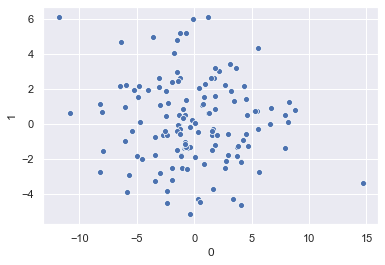

In [47]:
sns.scatterplot(x=0, y=1, data=df_pca_transformed_normed)

## Clustering

In [48]:
def Do_Clustering_KMeans(components=2, data=df_pca_transformed_normed):
    ##
    clusterer = KMeans(n_clusters=components, random_state=0).fit(data)

    preds = clusterer.predict(data)

    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    
    return score, preds, centers




### Finding Best Number of Clusters

In [49]:
number_of_components = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for n_components in number_of_components:
    score, _, _ = Do_Clustering_KMeans(components=n_components)
    print('With {} clusters, the silhouette coefficient is {:.3f}.'.format(n_components, score))

With 2 clusters, the silhouette coefficient is 0.251.
With 3 clusters, the silhouette coefficient is 0.216.
With 4 clusters, the silhouette coefficient is 0.190.
With 5 clusters, the silhouette coefficient is 0.177.
With 6 clusters, the silhouette coefficient is 0.188.
With 7 clusters, the silhouette coefficient is 0.176.
With 8 clusters, the silhouette coefficient is 0.184.
With 9 clusters, the silhouette coefficient is 0.162.
With 10 clusters, the silhouette coefficient is 0.181.
With 11 clusters, the silhouette coefficient is 0.158.
With 12 clusters, the silhouette coefficient is 0.156.
With 13 clusters, the silhouette coefficient is 0.159.
With 14 clusters, the silhouette coefficient is 0.154.


### Clusters

In [50]:
def cluster_results(reduced_data, preds, centers, first_axis=0, second_axis=1, pca_samples=None):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = first_axis, y = second_axis, 
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    if pca_samples is not None:
        ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
                   s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA Data - Centroids Marked by Number");

In [51]:
_, preds, centers = Do_Clustering_KMeans(components=2)

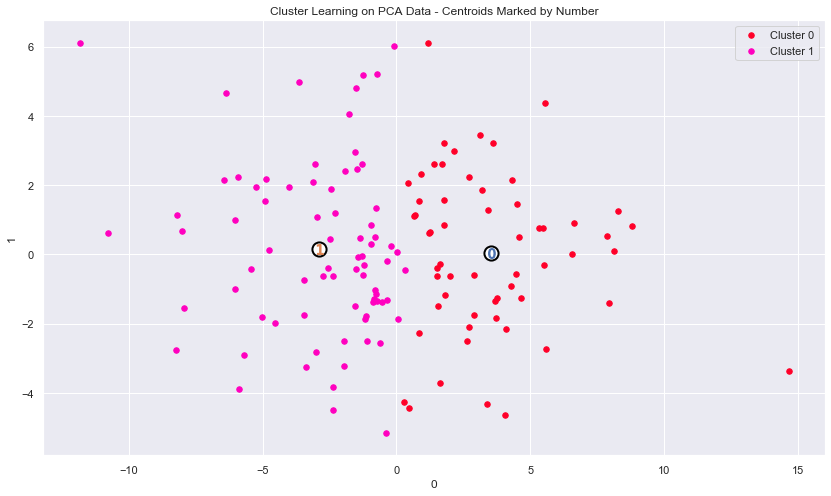

In [52]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=1)

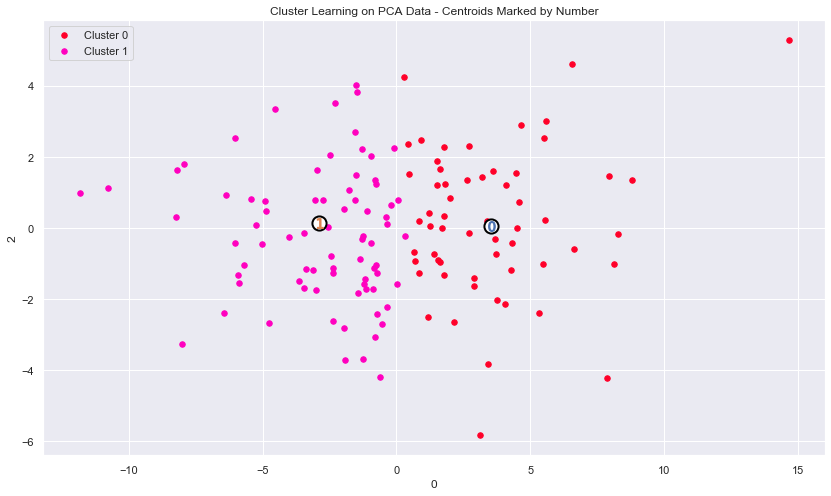

In [53]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=2)

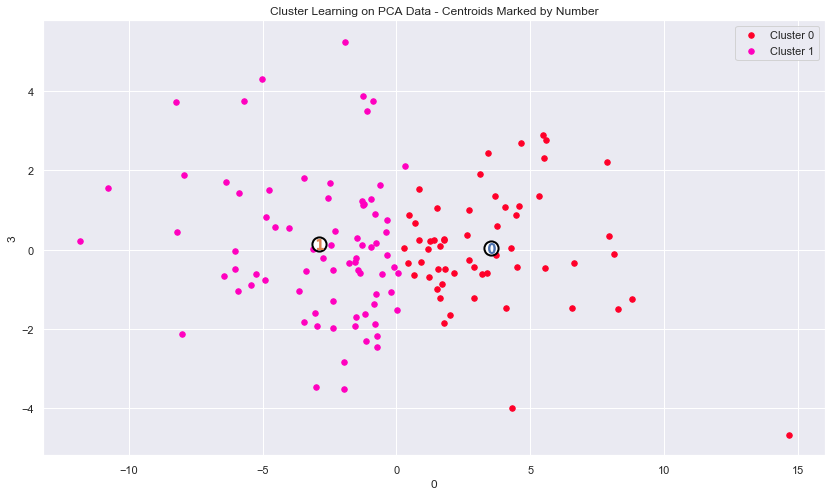

In [54]:
cluster_results(df_pca_transformed_normed, preds, centers, first_axis=0, second_axis=3)

In [55]:
df_transformed_normed.index[np.argmax(df_pca_transformed_normed[0])]

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


'Kahului-Wailuku-Lahaina'

In [56]:
df_transformed_normed.index[np.argmin(df_pca_transformed_normed[0])]

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


'Warren-Troy-Farmington Hills'

## Principal Component Importance

In [57]:
dict_comp_feat = {}
for i, comp_original in enumerate(pca.components_):
    comp = np.abs(comp_original)
#     print(comp)
    out_arr = np.argsort(comp)
    out_arr = np.flip(out_arr)
    out_arr_first_ten = out_arr[0:20]
    dict_temp = {}
    dict_temp['importances'] = comp_original[out_arr_first_ten]
    dict_temp['features'] = df_transformed_normed.columns[out_arr_first_ten]
    dict_comp_feat[i] = dict_temp
    

In [58]:
def pca_importance(comp=None, dict_comp_feat=None, pca=None):

    ratios = pca.explained_variance_ratio_ #.reshape(len(pca.components_), 1)

    plt.figure(figsize=(14,8));
    
    components = dict_comp_feat[comp]
    components = pd.DataFrame(components)

    # Plot the feature weights as a function of the components
    explained_variance_ratio = pca.explained_variance_ratio_[comp]
    g = sns.barplot(x="features", y="importances", data=components)
    g.set_title("component {}, explained_variance_ratio is {:.2f}".format(comp, explained_variance_ratio))
    
    g.set_xticklabels(g.get_xticklabels(), rotation=45)

    return

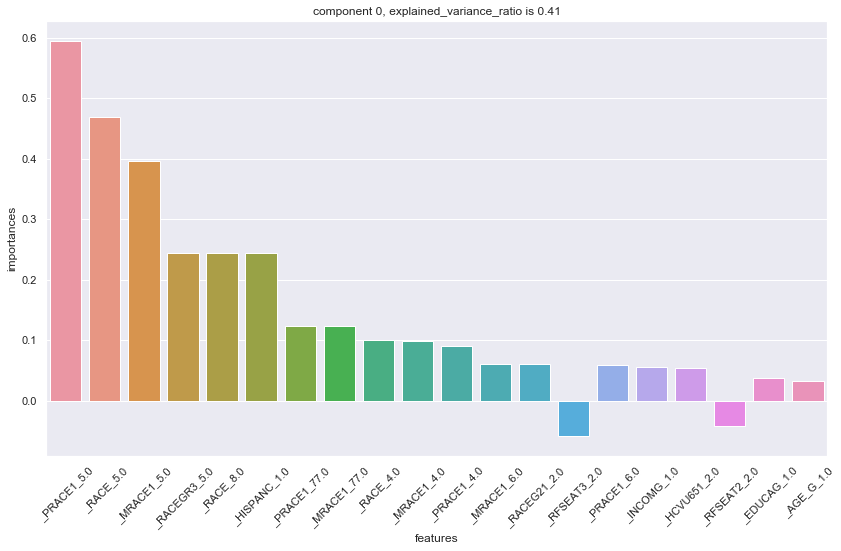

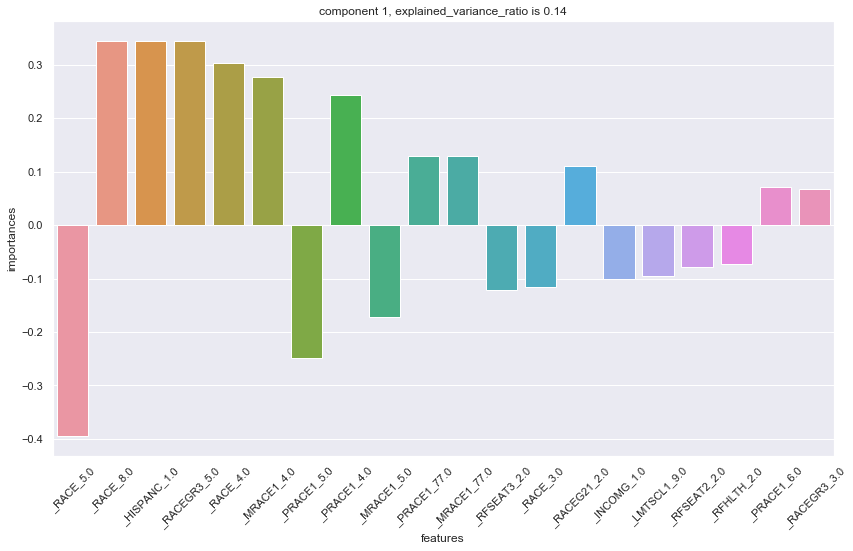

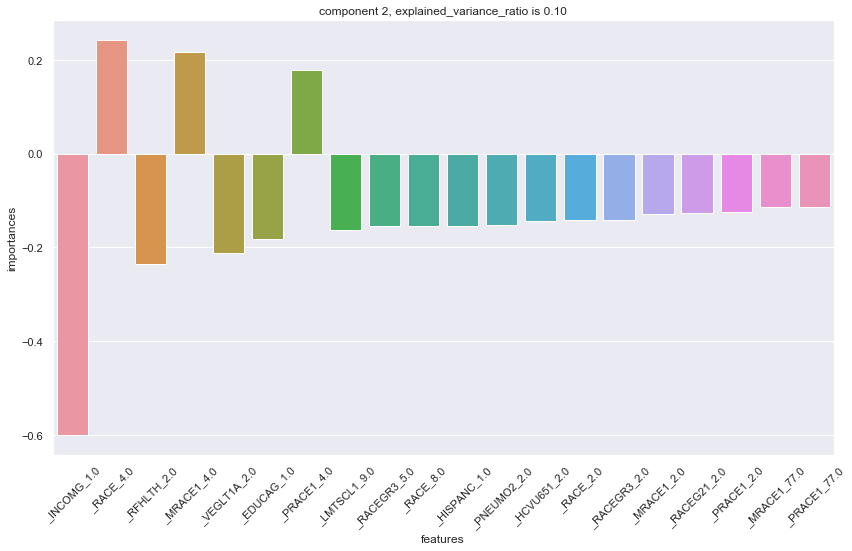

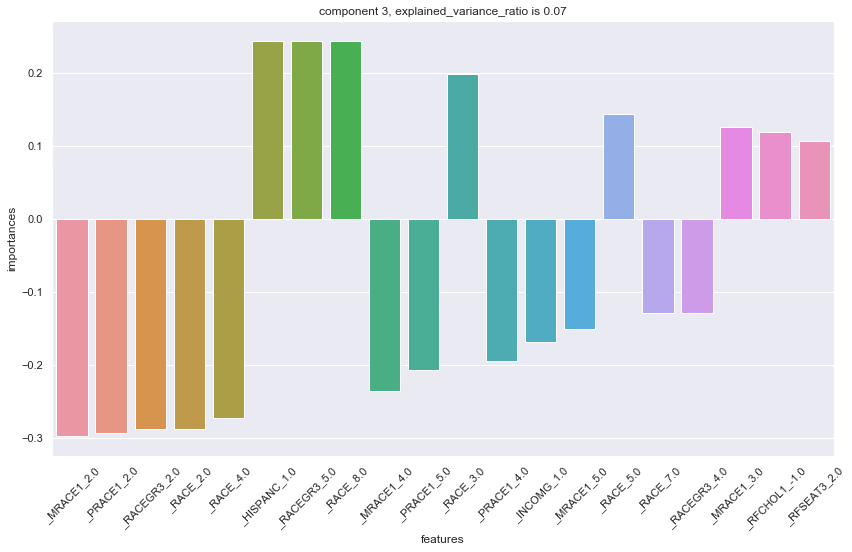

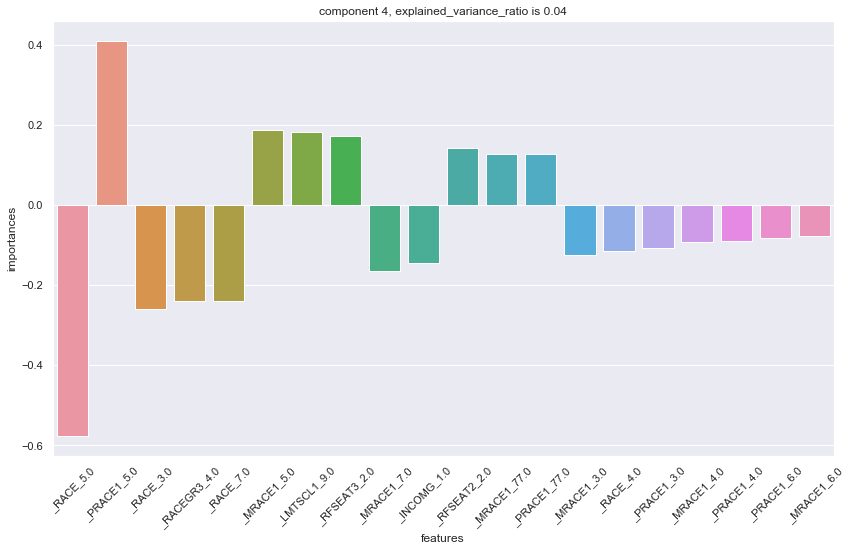

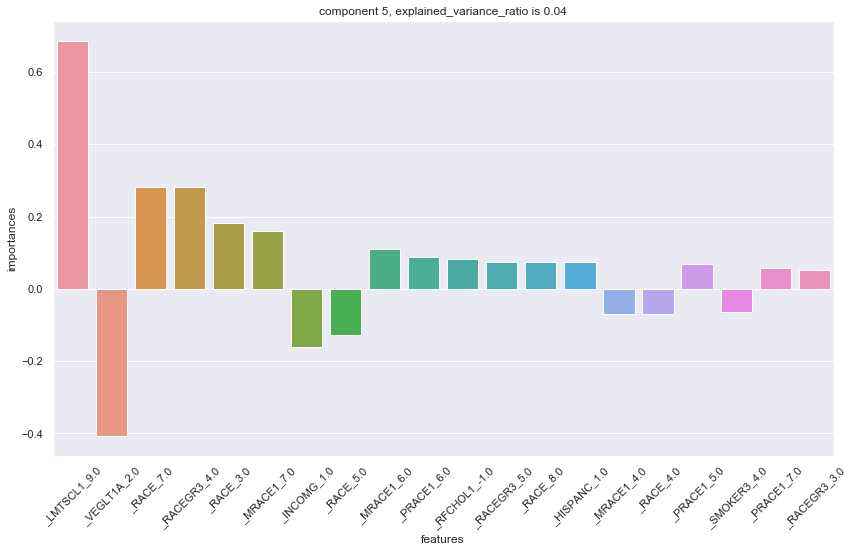

In [59]:
for comp in range(len(pca.components_)):
    pca_importance(comp=comp, dict_comp_feat=dict_comp_feat, pca=pca)